In [2338]:
# Import all necessary packages and functions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlalchemy as sa
import sql_functions as sf
import psycopg2 # for export to DBeaver: needed to get database exception errors when uploading dataframe

#pandas settings for big numbers (to not show numbers in scientific format)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None  # default='warn' - to turn off the SettingWithCopyWarning

# Connection to DBeaver for necessary dataframes - EU only

In [2339]:
# fish catch EU  - all species

schema = "capstone_fish_are_friends"
table_name = "catch_eu_all"
fish_catch_all_species = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")
fish_catch_all_species.head()

,country,year,unit,volume,fishing_region,species
0,Denmark,2020,Tonnes live weight,0.00,All fishing regions,Adriatic sturgeon
1,European Union,2019,Tonnes live weight,0.00,All fishing regions,Adriatic sturgeon
2,European Union,2020,Tonnes live weight,0.00,All fishing regions,Adriatic sturgeon
3,Ireland,2019,Tonnes live weight,0.00,All fishing regions,Adriatic sturgeon
4,Ireland,2020,Tonnes live weight,0.00,All fishing regions,Adriatic sturgeon


In [2340]:
# aquaculture EU production - all species

schema = "capstone_fish_are_friends"
table_name = "aquaclt_prod_eu_all"
aquaculture_prod_all_species = sf.get_dataframe(f"SELECT * FROM {schema}.{table_name}")
aquaculture_prod_all_species = aquaculture_prod_all_species[["country", "year", "species", "volume", "unit", "aqua_method", "aqua_environment", "production_region"]]
aquaculture_prod_all_species.head()

,country,year,species,volume,unit,aqua_method,aqua_environment,production_region
0,Iceland,2009,Arctic char,12688683.56,Eur,All methods,Brackish water,All production areas
1,Iceland,2010,Arctic char,13777336.58,Eur,All methods,Brackish water,All production areas
2,Iceland,2011,Arctic char,16300898.20,Eur,All methods,Brackish water,All production areas
3,Iceland,2009,Arctic char,5275.96,Euro per ton,All methods,Brackish water,All production areas
4,Iceland,2010,Arctic char,5676.69,Euro per ton,All methods,Brackish water,All production areas


### Check datatypes in all dataframes 

In [2341]:
display(fish_catch_all_species.info(), 
        aquaculture_prod_all_species.info(),
        )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253597 entries, 0 to 253596
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         253597 non-null  object 
 1   year            253597 non-null  int64  
 2   unit            253597 non-null  object 
 3   volume          253597 non-null  float64
 4   fishing_region  253597 non-null  object 
 5   species         253597 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57985 entries, 0 to 57984
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            57985 non-null  object 
 1   year               57985 non-null  int64  
 2   species            57985 non-null  object 
 3   volume             57985 non-null  float64
 4   unit               57985 non-null  object 
 5   aqua_metho

None

None

# 1. Fish catch in EU: Prepare the dataset for further analysis

In [2342]:
# sort values by country and year to check data
fish_catch_all_species.sort_values(by=["country", "year"], inplace=True)
fish_catch_all_species.reset_index(drop=True, inplace=True)
fish_catch_all_species.head(20)
fish_catch_all_species.tail(20)

,country,year,unit,volume,fishing_region,species
253577,United Kingdom,2019,Tonnes live weight,60791.15,All fishing regions,Blue whiting(=Poutassou)
253578,United Kingdom,2019,Tonnes live weight,60791.15,"Atlantic, Northeast",Blue whiting(=Poutassou)
253579,United Kingdom,2019,Tonnes live weight,19075.53,All fishing regions,Whelk
253580,United Kingdom,2019,Tonnes live weight,19075.53,"Atlantic, Northeast",Whelk
253581,United Kingdom,2019,Tonnes live weight,12970.55,All fishing regions,Whiting
253582,United Kingdom,2019,Tonnes live weight,12970.55,"Atlantic, Northeast",Whiting
253583,United Kingdom,2019,Tonnes live weight,1249.69,All fishing regions,Witch flounder
253584,United Kingdom,2019,Tonnes live weight,1249.69,"Atlantic, Northeast",Witch flounder
253585,United Kingdom,2019,Tonnes live weight,22.12,All fishing regions,"Wrasses, hogfishes, etc. nei"
253586,United Kingdom,2019,Tonnes live weight,22.12,"Atlantic, Northeast","Wrasses, hogfishes, etc. nei"


In [2343]:
fish_catch_all_species.query("country == 'France' and species.str.contains('Tunas, bonitos, billfishes', case=False) and year >= 2016 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
98302,France,2016,Tonnes live weight,102303474.00,All fishing regions,"Tunas, bonitos, billfishes"
99397,France,2017,Tonnes live weight,122152.21,All fishing regions,"Tunas, bonitos, billfishes"
100598,France,2018,Tonnes live weight,145724886.00,All fishing regions,"Tunas, bonitos, billfishes"
101792,France,2019,Tonnes live weight,133966271.00,All fishing regions,"Tunas, bonitos, billfishes"
103018,France,2020,Tonnes live weight,102044292.00,All fishing regions,"Tunas, bonitos, billfishes"


In [2344]:
fish_catch_all_species.query("country == 'France' and species.str.contains('Lobsters, spiny-rock lobsters|King crabs, squat-lobsters', case=False) and year >= 2016 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
98336,France,2016,Tonnes live weight,5334303.00,All fishing regions,"Lobsters, spiny-rock lobsters"
98339,France,2016,Tonnes live weight,9977.00,All fishing regions,"King crabs, squat-lobsters"
99434,France,2017,Tonnes live weight,4599289.00,All fishing regions,"Lobsters, spiny-rock lobsters"
99439,France,2017,Tonnes live weight,10751.00,All fishing regions,"King crabs, squat-lobsters"
100630,France,2018,Tonnes live weight,3293209.00,All fishing regions,"Lobsters, spiny-rock lobsters"
100634,France,2018,Tonnes live weight,11645.00,All fishing regions,"King crabs, squat-lobsters"
101824,France,2019,Tonnes live weight,3288566.00,All fishing regions,"Lobsters, spiny-rock lobsters"
101827,France,2019,Tonnes live weight,12926.00,All fishing regions,"King crabs, squat-lobsters"
103049,France,2020,Tonnes live weight,3156849.00,All fishing regions,"Lobsters, spiny-rock lobsters"
103053,France,2020,Tonnes live weight,5.12,All fishing regions,"King crabs, squat-lobsters"


In [2345]:
# We noticed that France has extremely high values for tuna/lobster/shrimp fish catch volume for the years 2016, 2018-2020- resulting in a per year consumption of 1500kg/capita. 
# The oceans must be empty by now! :D 
# Comparing it with prior years, it seems like the values has been multiplicated by 1000. So we will divide them by 1000.
fish_catch_all_species.query("country == 'France' and species.str.contains('Tunas, bonitos, billfishes', case=False)")

# Indices for values: 98302	, 100598, 101792, 103018
# Use df.loc for updating the values 
# Tuna
fish_catch_all_species.loc[98302, 'volume'] = (102303474.00/1000) 
fish_catch_all_species.loc[100598, 'volume'] = (145724886.00/1000) 
fish_catch_all_species.loc[101792, 'volume'] = (133966271.00/1000) 
fish_catch_all_species.loc[103018, 'volume'] = (102044292.00/1000) 

# Lobster 
# Index 98336, 99434, 100630, 101824, 103049
# Volume 5334303.00 , 4599289.00, 3293209.00, 3288566.00, 3156849.00

fish_catch_all_species.loc[98336, 'volume'] = (5334303.00/1000) 
fish_catch_all_species.loc[99434, 'volume'] = (4599289.00/1000) 
fish_catch_all_species.loc[100630, 'volume'] = (3293209.00/1000) 
fish_catch_all_species.loc[101824, 'volume'] = (3288566.00/1000) 
fish_catch_all_species.loc[103049, 'volume'] = (3156849.00/1000) 

# Shrimp
# Index 98342, 99442, 101830, 103056
# Volume 645877.00, 1094225.00, 594044.00, 657507.00

fish_catch_all_species.loc[98342, 'volume'] = (645877.00/1000) 
fish_catch_all_species.loc[99442, 'volume'] = (1094225.00/1000) 
fish_catch_all_species.loc[101830, 'volume'] = (594044.00/1000) 
fish_catch_all_species.loc[103056, 'volume'] = (657507.00/1000) 


In [2346]:
# Check data
fish_catch_all_species.query("country == 'France' and species.str.contains('Shrimps, prawns', case=False) and year >= 2016 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
98342,France,2016,Tonnes live weight,645.88,All fishing regions,"Shrimps, prawns"
99442,France,2017,Tonnes live weight,1094.22,All fishing regions,"Shrimps, prawns"
100637,France,2018,Tonnes live weight,651.20,All fishing regions,"Shrimps, prawns"
101830,France,2019,Tonnes live weight,594.04,All fishing regions,"Shrimps, prawns"
103056,France,2020,Tonnes live weight,657.51,All fishing regions,"Shrimps, prawns"


In [2347]:
# As for France there were other countries with suspicious values - Poland, Netherlands and Germany
# Check data to get indices/values

# Poland
fish_catch_all_species.query("country == 'Poland' and species.str.contains('Salmons, trouts, smelts', case=False) and year >= 2016 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
166774,Poland,2016,Tonnes live weight,282.13,All fishing regions,"Salmons, trouts, smelts"
166989,Poland,2017,Tonnes live weight,297.98,All fishing regions,"Salmons, trouts, smelts"
167203,Poland,2018,Tonnes live weight,372635.00,All fishing regions,"Salmons, trouts, smelts"
167398,Poland,2019,Tonnes live weight,177951.00,All fishing regions,"Salmons, trouts, smelts"
167590,Poland,2020,Tonnes live weight,173559.00,All fishing regions,"Salmons, trouts, smelts"


In [2348]:
# Comparing it with prior years, it seems like the values has been multiplicated by 1000. So we will divide them by 1000.
fish_catch_all_species.query("country == 'Poland' and species.str.contains('Tunas, bonitos, billfishes', case=False)")

# Use df.loc for updating the values  

# Tuna
# Indices for values: 167609
# Volume  434827.00
fish_catch_all_species.loc[167609, 'volume'] = (434827.00/1000) 

# Salmon 
# Index 167203, 167398, 167590
# Volume 372635.00 , 177951.00, 173559.00

fish_catch_all_species.loc[167203, 'volume'] = (372635.00/1000) 
fish_catch_all_species.loc[167398, 'volume'] = (177951.00/1000) 
fish_catch_all_species.loc[167590, 'volume'] = (173559.00/1000) 

# Shrimp
# Index 167422, 167620
# Volume 628903.00, 1420662.00

fish_catch_all_species.loc[167422, 'volume'] = (628903.00/1000) 
fish_catch_all_species.loc[167620, 'volume'] = (1420662.00/1000)

In [2349]:
# Check data
fish_catch_all_species.query("country == 'Poland' and species.str.contains('Salmons, trouts, smelts', case=False) and year >= 2016 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
166774,Poland,2016,Tonnes live weight,282.13,All fishing regions,"Salmons, trouts, smelts"
166989,Poland,2017,Tonnes live weight,297.98,All fishing regions,"Salmons, trouts, smelts"
167203,Poland,2018,Tonnes live weight,372.63,All fishing regions,"Salmons, trouts, smelts"
167398,Poland,2019,Tonnes live weight,177.95,All fishing regions,"Salmons, trouts, smelts"
167590,Poland,2020,Tonnes live weight,173.56,All fishing regions,"Salmons, trouts, smelts"


In [2350]:
# Check data to get indices/values

# Netherlands
fish_catch_all_species.query("country == 'Netherlands' and species.str.contains('Lobsters, spiny-rock lobsters|King crabs, squat-lobsters', case=False) and year >= 2018 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
154833,Netherlands,2018,Tonnes live weight,900016.00,All fishing regions,"Lobsters, spiny-rock lobsters"
155170,Netherlands,2019,Tonnes live weight,1465301.00,All fishing regions,"Lobsters, spiny-rock lobsters"
155531,Netherlands,2020,Tonnes live weight,990931.00,All fishing regions,"Lobsters, spiny-rock lobsters"


In [2351]:
# Use df.loc for updating the values 

# Tuna
# Indices for values: 154818, 155156, 155517
# Volume  273141.00, 103314.00, 80209.00
fish_catch_all_species.loc[154818, 'volume'] = (273141.00/1000) 
fish_catch_all_species.loc[155156, 'volume'] = (103314.00/1000) 
fish_catch_all_species.loc[155517, 'volume'] = (80209.00/1000) 

# Salmon 
# Index 154798
# Volume 122684.00

fish_catch_all_species.loc[154798, 'volume'] = (122684.00/1000)

# Shrimp
# Index 154835, 155172, 155533
# Volume 27384514.00, 16256562.00, 17951723.00

fish_catch_all_species.loc[154835, 'volume'] = (27384514.00/1000) 
fish_catch_all_species.loc[155172, 'volume'] = (16256562.00/1000)
fish_catch_all_species.loc[155533, 'volume'] = (17951723.00/1000)

# Lobster
# Index 154833, 155170, 155531
# Volume 900016.00, 1465301.00, 990931.00

fish_catch_all_species.loc[154833, 'volume'] = (900016.00/1000) 
fish_catch_all_species.loc[155170, 'volume'] = (1465301.00/1000)
fish_catch_all_species.loc[155531, 'volume'] = (990931.00/1000)

In [2352]:
# Check data
fish_catch_all_species.query("country == 'Netherlands' and species.str.contains('Shrimps, prawns', case=False) and year >= 2018 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
154835,Netherlands,2018,Tonnes live weight,27384.51,All fishing regions,"Shrimps, prawns"
155172,Netherlands,2019,Tonnes live weight,16256.56,All fishing regions,"Shrimps, prawns"
155533,Netherlands,2020,Tonnes live weight,17951.72,All fishing regions,"Shrimps, prawns"


In [2353]:
# Check data to get indices/values

# Germany
fish_catch_all_species.query("country == 'Germany' and species.str.contains('Salmons, trouts, smelts', case=False) and 2010 <= year <= 2016 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
107522,Germany,2010,Tonnes live weight,32.00,All fishing regions,"Salmons, trouts, smelts"
107746,Germany,2011,Tonnes live weight,59.81,All fishing regions,"Salmons, trouts, smelts"
108015,Germany,2012,Tonnes live weight,61236.00,All fishing regions,"Salmons, trouts, smelts"
108258,Germany,2013,Tonnes live weight,48977.00,All fishing regions,"Salmons, trouts, smelts"
108498,Germany,2014,Tonnes live weight,33995.00,All fishing regions,"Salmons, trouts, smelts"
108762,Germany,2015,Tonnes live weight,56643.00,All fishing regions,"Salmons, trouts, smelts"
109032,Germany,2016,Tonnes live weight,41043.00,All fishing regions,"Salmons, trouts, smelts"


In [2354]:
# Use df.loc for updating the values 

# Tuna
# Indices for values: 108519, 108783, 107768
# Volume  5656.00, 5651.00, 770.15
fish_catch_all_species.loc[108519, 'volume'] = (5656.00/1000) 
fish_catch_all_species.loc[108783, 'volume'] = (5651.00/1000)
fish_catch_all_species.loc[107768, 'volume'] = (770.15/1000)

# Salmon 
# Index 108015, 108258, 108498, 108762, 109032
# Volume 61236.00, 48977.00, 33995.00, 56643.00, 41043.00

fish_catch_all_species.loc[108015, 'volume'] = (61236.00/1000)
fish_catch_all_species.loc[108258, 'volume'] = (48977.00/1000)
fish_catch_all_species.loc[108498, 'volume'] = (33995.00/1000)
fish_catch_all_species.loc[108762, 'volume'] = (56643.00/1000)
fish_catch_all_species.loc[109032, 'volume'] = (41043.00/1000)

# Shrimp
# Index 107785, 108050, 108289, 108536, 108800, 109069
# Volume 17337715.00, 16360027.00, 16165998.00, 15861946.00, 13934925.00, 7691145.00

fish_catch_all_species.loc[107785, 'volume'] = (17337715.00/1000) 
fish_catch_all_species.loc[108050, 'volume'] = (16360027.00/1000)
fish_catch_all_species.loc[108289, 'volume'] = (16165998.00/1000)
fish_catch_all_species.loc[108536, 'volume'] = (15861946.00/1000)
fish_catch_all_species.loc[108800, 'volume'] = (13934925.00/1000)
fish_catch_all_species.loc[109069, 'volume'] = (7691145.00/1000)

# Lobster
# Index 108048, 108287, 108534, 108798, 109067
# Volume 396714.00, 429726.00, 418712.00, 437346.00, 862581.00

fish_catch_all_species.loc[108048, 'volume'] = (396714.00/1000) 
fish_catch_all_species.loc[108287, 'volume'] = (429726.00/1000)
fish_catch_all_species.loc[108534, 'volume'] = (418712.00/1000)
fish_catch_all_species.loc[108798, 'volume'] = (37346.00/1000)
fish_catch_all_species.loc[109067, 'volume'] = (862581.00/1000)

In [2355]:
# Check data
fish_catch_all_species.query("country == 'Germany' and species.str.contains('Shrimps, prawns', case=False) and 2010 < year <= 2016 and fishing_region == 'All fishing regions'")

,country,year,unit,volume,fishing_region,species
107785,Germany,2011,Tonnes live weight,17337.72,All fishing regions,"Shrimps, prawns"
108050,Germany,2012,Tonnes live weight,16360.03,All fishing regions,"Shrimps, prawns"
108289,Germany,2013,Tonnes live weight,16166.00,All fishing regions,"Shrimps, prawns"
108536,Germany,2014,Tonnes live weight,15861.95,All fishing regions,"Shrimps, prawns"
108800,Germany,2015,Tonnes live weight,13934.92,All fishing regions,"Shrimps, prawns"
109069,Germany,2016,Tonnes live weight,7691.15,All fishing regions,"Shrimps, prawns"


In [2356]:
# Albania has data from 2012 (not 2000 as the other countries), check unique values and found out: only two years of data. Delete Albania.
# As there are rows for different fishing regions - we only want to keep the totals of all fishing regions
fish_catch_all_species.query("country == 'Albania'").year.unique()
fish_catch_all_species = fish_catch_all_species[fish_catch_all_species.country != "Albania"]
fish_catch_all_species = fish_catch_all_species[fish_catch_all_species.fishing_region == "All fishing regions"]
fish_catch_all_species
fish_catch_all_species.query("country == 'France' and species.str.contains('Tunas, bonitos, billfishes', case=False)")

,country,year,unit,volume,fishing_region,species
82958,France,2000,Tonnes live weight,162092.08,All fishing regions,"Tunas, bonitos, billfishes"
83939,France,2001,Tonnes live weight,146554.06,All fishing regions,"Tunas, bonitos, billfishes"
84900,France,2002,Tonnes live weight,164698.04,All fishing regions,"Tunas, bonitos, billfishes"
85859,France,2003,Tonnes live weight,175850.02,All fishing regions,"Tunas, bonitos, billfishes"
86801,France,2004,Tonnes live weight,168118.01,All fishing regions,"Tunas, bonitos, billfishes"
87697,France,2005,Tonnes live weight,165343.30,All fishing regions,"Tunas, bonitos, billfishes"
88533,France,2006,Tonnes live weight,141911.11,All fishing regions,"Tunas, bonitos, billfishes"
89302,France,2007,Tonnes live weight,100984.55,All fishing regions,"Tunas, bonitos, billfishes"
90113,France,2008,Tonnes live weight,101114.15,All fishing regions,"Tunas, bonitos, billfishes"
90948,France,2009,Tonnes live weight,90297.11,All fishing regions,"Tunas, bonitos, billfishes"


In [2357]:
# Reset index of updated dataframe
fish_catch_all_species.reset_index(drop=True, inplace=True)
fish_catch_all_species

,country,year,unit,volume,fishing_region,species
0,Belgium,2000,Tonnes live weight,468.01,All fishing regions,Pouting(=Bib)
1,Belgium,2000,Tonnes live weight,423.00,All fishing regions,Brill
2,Belgium,2000,Tonnes live weight,0.00,All fishing regions,European seabass
3,Belgium,2000,Tonnes live weight,291.00,All fishing regions,Atlantic wolffish
4,Belgium,2000,Tonnes live weight,0.00,All fishing regions,Cartilaginous fishes nei
...,...,...,...,...,...,...
99007,United Kingdom,2019,Tonnes live weight,2023.00,All fishing regions,Wreckfish
99008,United Kingdom,2019,Tonnes live weight,4.00,All fishing regions,Yellowtail flounder
99009,United Kingdom,2019,Tonnes live weight,11.28,All fishing regions,Corkwing wrasse
99010,United Kingdom,2019,Tonnes live weight,14.24,All fishing regions,Yellowfin tuna


In [2358]:
# Take a look at the years we have available for each country: seems like there is data for 2000 to 2020 for each country.
fish_catch_all_species[["country", "year"]].groupby("country").describe()

year                                                     
                  count    mean  std     min     25%     50%     75%     max
country                                                                     
Belgium         1872.00 2010.07 6.34 2000.00 2004.00 2010.00 2016.00 2020.00
Bulgaria        1555.00 2007.76 6.19 2000.00 2003.00 2005.00 2013.00 2020.00
Croatia         2372.00 2011.86 5.83 2000.00 2008.00 2013.00 2017.00 2020.00
Cyprus          2066.00 2011.89 5.99 2000.00 2007.00 2013.00 2017.00 2020.00
Denmark         2903.00 2009.34 6.23 2000.00 2004.00 2009.00 2015.00 2020.00
Estonia         1853.00 2008.82 6.28 2000.00 2003.00 2008.00 2014.00 2020.00
European Union 17321.00 2010.80 6.17 2000.00 2005.00 2011.00 2016.00 2020.00
Finland          736.00 2010.14 5.98 2000.00 2005.00 2010.00 2015.00 2020.00
France          7768.00 2010.37 6.19 2000.00 2005.00 2011.00 2016.00 2020.00
Germany         2814.00 2009.04 6.31 2000.00 2003.00 2008.00 2015.00 2020.00
Greece          2104.00 2010.14 6.18 2000.00 2005.00 2010.00 2016.00 2020.00
Iceland         2001.00 2008.79 6.21 2000.00 2003.00 2008.00 2014.00 2020.00
Ireland         3573.00 2008.83 6.31 2000.00 2003.00 2008.00 2014.00 2020.00
Italy           3285.00 2011.69 6.41 2000.00 2006.00 2013.00 2018.00 2020.00
Latvia          1733.00 2008.71 6.34 2000.00 2003.00 2008.00 2014.00 2020.00
Lithuania       2084.00 2008.67 6.18 2000.00 2003.00 2008.00 2014.00 2020.00
Malta           2663.00 2012.21 5.70 2000.00 2008.00 2013.00 2017.00 2020.00
Netherlands     3042.00 2010.19 6.31 2000.00 2004.00 2011.00 2016.00 2020.00
Norway          3080.00 2009.54 6.34 2000.00 2004.00 2009.00 2015.00 2020.00
Poland          2127.00 2008.89 6.47 2000.00 2003.00 2008.00 2015.00 2020.00
Portugal        8631.00 2009.42 6.09 2000.00 2004.00 2009.00 2014.00 2020.00
Romania         1448.00 2006.39 5.90 2000.00 2002.00 2004.00 2010.00 2020.00
Slovenia        2263.00 2010.93 5.65 2000.00 2007.00 2011.00 2016.00 2020.00
Spain          11006.00 2011.78 6.16 2000.00 2006.00 2013.00 2017.00 2020.00
Sweden          2257.00 2010.13 6.34 2000.00 2004.00 2010.00 2016.00 2020.00
Turkey          2094.00 2009.96 6.06 2000.00 2005.00 2010.00 2015.00 2020.00
United Kingdom  4361.00 2009.17 5.89 2000.00 2004.00 2009.00 2014.00 2019.00

In [2359]:
# Output from groupby.describe()
 #       count	    mean	std	    min	2   5%	    50%	    75%	    max
#Romania	3502.00	2005.72	5.61	2000.00	2002.00	2004.00	2008.00	2020.00
# Seems like they reduced fishing activities after 2008 as most counts are before that
# Check values for Romania - to see if we have data for all years.
fish_catch_all_species.query("country == 'Romania'").year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [2360]:
# Check with groupby how it looks with all the species
fish_catch_all_species.groupby(["country", "year", "species"]).sum().sort_values(by="volume", ascending=False).sort_values(by=["country","year"]).tail(50)

volume
country        year species                                      
United Kingdom 2019 White skate                              2.50
                    Pink cusk-eel                            2.45
                    Bigeye tuna                              1.86
                    Dogfish sharks nei                       1.74
                    Argentines                               1.51
                    King crabs, squat-lobsters               1.35
                    Craylets, squat lobsters nei             1.35
                    Arctic skate                             1.33
                    Albacore                                 1.28
                    Blue skate                               1.23
                    Marine crabs nei                         1.09
                    Rock cook                                1.08
                    Yellowtail amberjack                     1.00
                    Gilthead seabream                        0.90
                    Wahoo                                    0.85
                    Marlins,sailfishes,etc. nei              0.85
                    Rudderfish                               0.61
                    Blackspot seabream                       0.56
                    Starry ray                               0.52
                    Sea urchins nei                          0.45
                    Alfonsinos nei                           0.42
                    Allis and twaite shads                   0.37
                    Shads                                    0.37
                    Patagonian grenadier                     0.29
                    Various sharks nei                       0.28
                    Garfish                                  0.25
                    Marine fishes not identified             0.23
                    Groundfishes nei                         0.23
                    Round sardinella                         0.22
                    Roughhead grenadier                      0.18
                    Flatfishes nei                           0.17
                    Four-spot megrim                         0.16
                    Oilfish                                  0.13
                    Common stingray                          0.08
                    Angelshark                               0.08
                    Triggerfishes, durgons nei               0.05
                    Lumpfish(=Lumpsucker)                    0.04
                    Patagonian rockcod                       0.03
                    Mako sharks                              0.03
                    Atlantic bonito                          0.03
                    Patagonian toothfish                     0.02
                    Miscellaneous aquatic animal products    0.02
                    Sardinia coral                           0.02
                    Corals                                   0.02
                    Axillary seabream                        0.01
                    Pandalus shrimps nei                     0.01
                    Dragonet                                 0.01
                    Norway pout                              0.00
                    Marbled electric ray                     0.00
                    Meagre                                   0.00

In [2361]:
# We figured that we should summarize the species to their F-categories (eurostat) as there are more than 1400 different species
# Also the data is mixed up with full names and F-categories
fish_catch_all_species.species.nunique()

1484

In [2362]:
#create new dataframes to separate species categories values in two new columns
fish_freshwater =  fish_catch_all_species[fish_catch_all_species["species"] == "Freshwater fishes"]
fish_diadromous = fish_catch_all_species[fish_catch_all_species["species"] == "Diadromous fishes"]
fish_marine = fish_catch_all_species[fish_catch_all_species["species"] == "Marine fishes"]
fish_crustaceans = fish_catch_all_species[fish_catch_all_species["species"] == "Crustaceans"]
fish_molluscs = fish_catch_all_species[fish_catch_all_species["species"] == "Molluscs"]
fish_whales = fish_catch_all_species[fish_catch_all_species["species"] == "Whales, seals and other aquatic mammals"]
fish_other = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous aquatic animals"]
fish_corals = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous aquatic animal products"]
fish_plants = fish_catch_all_species[fish_catch_all_species["species"] == "Aquatic plants"]

display(fish_freshwater.head(), fish_diadromous.head(), fish_corals.head())

,country,year,unit,volume,fishing_region,species
24,Belgium,2000,Tonnes live weight,3.00,All fishing regions,Freshwater fishes
123,Belgium,2001,Tonnes live weight,5.00,All fishing regions,Freshwater fishes
222,Belgium,2002,Tonnes live weight,5.00,All fishing regions,Freshwater fishes
321,Belgium,2003,Tonnes live weight,1.00,All fishing regions,Freshwater fishes
420,Belgium,2004,Tonnes live weight,0.00,All fishing regions,Freshwater fishes


,country,year,unit,volume,fishing_region,species
26,Belgium,2000,Tonnes live weight,0.00,All fishing regions,Diadromous fishes
125,Belgium,2001,Tonnes live weight,0.00,All fishing regions,Diadromous fishes
224,Belgium,2002,Tonnes live weight,0.00,All fishing regions,Diadromous fishes
323,Belgium,2003,Tonnes live weight,0.00,All fishing regions,Diadromous fishes
422,Belgium,2004,Tonnes live weight,0.00,All fishing regions,Diadromous fishes


,country,year,unit,volume,fishing_region,species
1923,Bulgaria,2000,Tonnes live weight,0.00,All fishing regions,Miscellaneous aquatic animal products
2052,Bulgaria,2001,Tonnes live weight,0.00,All fishing regions,Miscellaneous aquatic animal products
2182,Bulgaria,2002,Tonnes live weight,0.00,All fishing regions,Miscellaneous aquatic animal products
2313,Bulgaria,2003,Tonnes live weight,0.00,All fishing regions,Miscellaneous aquatic animal products
2443,Bulgaria,2004,Tonnes live weight,0.00,All fishing regions,Miscellaneous aquatic animal products


In [2363]:
# new dataframe with all categories for further analysis
fish_catch_categories = pd.concat([fish_freshwater, 
                                    fish_diadromous, 
                                    fish_marine, 
                                    fish_crustaceans, 
                                    fish_molluscs, 
                                    fish_whales,
                                    fish_other,
                                    fish_plants], axis=0)

fish_catch_categories.species.unique()

array(['Freshwater fishes', 'Diadromous fishes', 'Marine fishes',
       'Crustaceans', 'Molluscs',
       'Whales, seals and other aquatic mammals',
       'Miscellaneous aquatic animals', 'Aquatic plants'], dtype=object)

In [2364]:
# Groupby countries to see sum of each category per year
fish_catch_categories.groupby(["country", "year", "species"]).sum().sort_values(by="volume", ascending=False).sort_values(by=["country","year"]).tail(20)

volume
country        year species                                   
United Kingdom 2016 Marine fishes                    548510.17
                    Molluscs                          79352.98
                    Crustaceans                       71963.71
                    Diadromous fishes                     7.58
                    Miscellaneous aquatic animals         7.31
               2017 Molluscs                       72728283.00
                    Crustaceans                    69827785.00
                    Marine fishes                    580155.49
                    Diadromous fishes                  7745.00
                    Miscellaneous aquatic animals         5.94
               2018 Marine fishes                 565832738.00
                    Molluscs                       65796171.00
                    Crustaceans                    65353079.00
                    Miscellaneous aquatic animals      6215.00
                    Diadromous fishes                  3669.00
               2019 Marine fishes                    474517.70
                    Crustaceans                       72626.25
                    Molluscs                          70145.11
                    Diadromous fishes                     6.17
                    Miscellaneous aquatic animals         3.11

In [2365]:
# create another dataframe to get all the subcategories for each species to summarize them
#create new dataframes to separate species subcategories values in two new columns

fish_1 =  fish_catch_all_species[fish_catch_all_species["species"] == "Carps, barbels and other cyprinids"]
fish_2 = fish_catch_all_species[fish_catch_all_species["species"] == "Tilapias and other cichlids"]
fish_3 = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous freshwater fishes"]
fish_4 = fish_catch_all_species[fish_catch_all_species["species"] == "Sturgeons, paddlefishes"]
fish_5 = fish_catch_all_species[fish_catch_all_species["species"] == "River eels"]
fish_6 = fish_catch_all_species[fish_catch_all_species["species"] == "Salmons, trouts, smelts"]
fish_7 = fish_catch_all_species[fish_catch_all_species["species"] == "Shads"]
fish_8 = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous diadromous fishes"]
fish_9 = fish_catch_all_species[fish_catch_all_species["species"] == "Flounders, halibuts, soles"]
fish_10 = fish_catch_all_species[fish_catch_all_species["species"] == "Cods, hakes, haddocks"]
fish_11 = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous coastal fishes"]
fish_12 = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous demersal fishes"]
fish_13 = fish_catch_all_species[fish_catch_all_species["species"] == "Herrings, sardines, anchovies"]
fish_14 = fish_catch_all_species[fish_catch_all_species["species"] == "Tunas, bonitos, billfishes"]
fish_15 = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous pelagic fishes"]
fish_16 = fish_catch_all_species[fish_catch_all_species["species"] == "Sharks, rays, chimaeras"]
fish_17 = fish_catch_all_species[fish_catch_all_species["species"] == "Marine fishes not identified"]
fish_18 = fish_catch_all_species[fish_catch_all_species["species"] == "Freshwater crustaceans"]
fish_19 = fish_catch_all_species[fish_catch_all_species["species"] == "Crabs, sea-spiders"]
fish_20 = fish_catch_all_species[fish_catch_all_species["species"] == "Lobsters, spiny-rock lobsters"]
fish_21 = fish_catch_all_species[fish_catch_all_species["species"] == "King crabs, squat-lobsters"]
fish_22 = fish_catch_all_species[fish_catch_all_species["species"] == "Shrimps, prawns"]
fish_23 = fish_catch_all_species[fish_catch_all_species["species"] == "Krill, planktonic crustaceans"]
fish_24 = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous marine crustaceans"]
fish_25 = fish_catch_all_species[fish_catch_all_species["species"] == "Freshwater molluscs"]
fish_26 = fish_catch_all_species[fish_catch_all_species["species"] == "Abalones, winkles, conchs"]
fish_27 = fish_catch_all_species[fish_catch_all_species["species"] == "Oysters"]
fish_28 = fish_catch_all_species[fish_catch_all_species["species"] == "Mussels"]
fish_29 = fish_catch_all_species[fish_catch_all_species["species"] == "Scallops, pectens"]
fish_30 = fish_catch_all_species[fish_catch_all_species["species"] == "Clams, cockles, arkshells"]
fish_31 = fish_catch_all_species[fish_catch_all_species["species"] == "Squids, cuttlefishes, octopuses"]
fish_32 = fish_catch_all_species[fish_catch_all_species["species"] == "Miscellaneous marine molluscs"]

fish_1.head()

,country,year,unit,volume,fishing_region,species
7904,Denmark,2000,Tonnes live weight,9.07,All fishing regions,"Carps, barbels and other cyprinids"
8076,Denmark,2001,Tonnes live weight,7.09,All fishing regions,"Carps, barbels and other cyprinids"
8248,Denmark,2002,Tonnes live weight,16.14,All fishing regions,"Carps, barbels and other cyprinids"
8420,Denmark,2003,Tonnes live weight,5.12,All fishing regions,"Carps, barbels and other cyprinids"
8592,Denmark,2004,Tonnes live weight,6.08,All fishing regions,"Carps, barbels and other cyprinids"


In [2366]:
# concatenate the different dataframes (we have left out whales, turtles and other marine animals to concentrate on fish, crustaceans and molluscs)
fish_subcategories_1 = pd.concat([fish_1, fish_2, fish_3, fish_4, fish_5, fish_6, fish_7, fish_8, fish_9,fish_10], axis=0)
fish_subcategories_2 = pd.concat([fish_11,
                                fish_12,
                                fish_13,
                                fish_14,
                                fish_15,
                                fish_16,
                                fish_17,
                                fish_18,
                                fish_19,
                                fish_20,
                                fish_21], axis=0)
fish_subcategories_3 = pd.concat([fish_22,
                                fish_23,
                                fish_24,
                                fish_25,
                                fish_26,
                                fish_27,
                                fish_28,
                                fish_29,
                                fish_30,
                                fish_31,
                               fish_32], axis=0)

fish_subcategories = pd.concat([fish_subcategories_1, fish_subcategories_2, fish_subcategories_3], axis=0)

fish_subcategories.head()

,country,year,unit,volume,fishing_region,species
7904,Denmark,2000,Tonnes live weight,9.07,All fishing regions,"Carps, barbels and other cyprinids"
8076,Denmark,2001,Tonnes live weight,7.09,All fishing regions,"Carps, barbels and other cyprinids"
8248,Denmark,2002,Tonnes live weight,16.14,All fishing regions,"Carps, barbels and other cyprinids"
8420,Denmark,2003,Tonnes live weight,5.12,All fishing regions,"Carps, barbels and other cyprinids"
8592,Denmark,2004,Tonnes live weight,6.08,All fishing regions,"Carps, barbels and other cyprinids"


In [2367]:
# reset index of each new dataframe
fish_subcategories.reset_index(drop=True, inplace=True)
fish_catch_categories.reset_index(drop=True, inplace=True)

display(fish_subcategories.head(), fish_catch_categories.head())

,country,year,unit,volume,fishing_region,species
0,Denmark,2000,Tonnes live weight,9.07,All fishing regions,"Carps, barbels and other cyprinids"
1,Denmark,2001,Tonnes live weight,7.09,All fishing regions,"Carps, barbels and other cyprinids"
2,Denmark,2002,Tonnes live weight,16.14,All fishing regions,"Carps, barbels and other cyprinids"
3,Denmark,2003,Tonnes live weight,5.12,All fishing regions,"Carps, barbels and other cyprinids"
4,Denmark,2004,Tonnes live weight,6.08,All fishing regions,"Carps, barbels and other cyprinids"


,country,year,unit,volume,fishing_region,species
0,Belgium,2000,Tonnes live weight,3.00,All fishing regions,Freshwater fishes
1,Belgium,2001,Tonnes live weight,5.00,All fishing regions,Freshwater fishes
2,Belgium,2002,Tonnes live weight,5.00,All fishing regions,Freshwater fishes
3,Belgium,2003,Tonnes live weight,1.00,All fishing regions,Freshwater fishes
4,Belgium,2004,Tonnes live weight,0.00,All fishing regions,Freshwater fishes


In [2368]:
# change column name for the categories
fish_catch_categories.rename(columns={"species" : "categories_species"}, inplace=True)
fish_catch_categories.head()

,country,year,unit,volume,fishing_region,categories_species
0,Belgium,2000,Tonnes live weight,3.00,All fishing regions,Freshwater fishes
1,Belgium,2001,Tonnes live weight,5.00,All fishing regions,Freshwater fishes
2,Belgium,2002,Tonnes live weight,5.00,All fishing regions,Freshwater fishes
3,Belgium,2003,Tonnes live weight,1.00,All fishing regions,Freshwater fishes
4,Belgium,2004,Tonnes live weight,0.00,All fishing regions,Freshwater fishes


In [2369]:
# Check values - idea: Add a new column with the categories_species such as "Freshwater fish" or "Crustaceans".
fish_subcategories.sort_values(by="country")

,country,year,unit,volume,fishing_region,species
5507,Belgium,2000,Tonnes live weight,1648.07,All fishing regions,"Sharks, rays, chimaeras"
2905,Belgium,2011,Tonnes live weight,257.20,All fishing regions,Miscellaneous coastal fishes
2906,Belgium,2012,Tonnes live weight,230.20,All fishing regions,Miscellaneous coastal fishes
2907,Belgium,2013,Tonnes live weight,223.30,All fishing regions,Miscellaneous coastal fishes
2908,Belgium,2014,Tonnes live weight,288.70,All fishing regions,Miscellaneous coastal fishes
...,...,...,...,...,...,...
8567,United Kingdom,2016,Tonnes live weight,22853.33,All fishing regions,"Abalones, winkles, conchs"
8568,United Kingdom,2017,Tonnes live weight,19610622.00,All fishing regions,"Abalones, winkles, conchs"
8569,United Kingdom,2018,Tonnes live weight,16702.63,All fishing regions,"Abalones, winkles, conchs"
8815,United Kingdom,2000,Tonnes live weight,444.00,All fishing regions,Oysters


In [2370]:
# create dictionary to match species to categories

categories_dict = {'Carps, barbels and other cyprinids' : 'Freshwater fishes',
'Tilapias and other cichlids' : 'Freshwater fishes',
'Miscellaneous freshwater fishes' : 'Freshwater fishes',
'Sturgeons, paddlefishes' : 'Diadromous fishes',
'River eels' : 'Diadromous fishes',
'Salmons, trouts, smelts' : 'Diadromous fishes',
'Shads' : 'Diadromous fishes',
'Miscellaneous diadromous fishes' : 'Diadromous fishes',
'Flounders, halibuts, soles' : 'Marine fishes',
'Cods, hakes, haddocks' : 'Marine fishes',
'Miscellaneous coastal fishes' : 'Marine fishes',
'Miscellaneous demersal fishes' : 'Marine fishes',
'Herrings, sardines, anchovies' : 'Marine fishes',
'Tunas, bonitos, billfishes' : 'Marine fishes',
'Miscellaneous pelagic fishes' : 'Marine fishes',
'Sharks, rays, chimaeras' : 'Marine fishes',
'Marine fishes not identified' : 'Marine fishes',
'Freshwater crustaceans' : 'Crustaceans',
'Crabs, sea-spiders' : 'Crustaceans',
'Lobsters, spiny-rock lobsters' : 'Crustaceans',
'King crabs, squat-lobsters' : 'Crustaceans',
'Shrimps, prawns' : 'Crustaceans',
'Krill, planktonic crustaceans' : 'Crustaceans',
'Miscellaneous marine crustaceans' : 'Crustaceans',
'Freshwater molluscs' : 'Molluscs',
'Abalones, winkles, conchs' : 'Molluscs',
'Oysters' : 'Molluscs',
'Mussels' : 'Molluscs',
'Scallops, pectens' : 'Molluscs',
'Clams, cockles, arkshells' : 'Molluscs',
'Squids, cuttlefishes, octopuses' : 'Molluscs',
'Miscellaneous marine molluscs' : 'Molluscs'}

In [2371]:
# add new column with categories using the dictionary
fish_subcategories["categories_species"] = fish_subcategories["species"].map(categories_dict)
fish_subcategories.head()

,country,year,unit,volume,fishing_region,species,categories_species
0,Denmark,2000,Tonnes live weight,9.07,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes
1,Denmark,2001,Tonnes live weight,7.09,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes
2,Denmark,2002,Tonnes live weight,16.14,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes
3,Denmark,2003,Tonnes live weight,5.12,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes
4,Denmark,2004,Tonnes live weight,6.08,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes


In [2372]:
# check values for Germany
fish_subcategories.query("country == 'Germany'").tail(15)

,country,year,unit,volume,fishing_region,species,categories_species
9968,Germany,2012,Tonnes live weight,6.66,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
9969,Germany,2013,Tonnes live weight,3051.00,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
9970,Germany,2014,Tonnes live weight,11092.00,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
9971,Germany,2015,Tonnes live weight,39998.00,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
9972,Germany,2016,Tonnes live weight,19275.00,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
9973,Germany,2017,Tonnes live weight,29.67,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
9974,Germany,2018,Tonnes live weight,8.00,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
9975,Germany,2019,Tonnes live weight,41.00,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
9976,Germany,2020,Tonnes live weight,68.11,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs
10338,Germany,2000,Tonnes live weight,0.00,All fishing regions,Miscellaneous marine molluscs,Molluscs


In [2373]:
# assign new variable for final dataframe for further analysis
fish_catch_final = fish_subcategories.sort_values(by=["country", "year"])
fish_catch_final.reset_index(drop=True, inplace=True)
fish_catch_final.head()

,country,year,unit,volume,fishing_region,species,categories_species
0,Belgium,2000,Tonnes live weight,3.00,All fishing regions,Miscellaneous freshwater fishes,Freshwater fishes
1,Belgium,2000,Tonnes live weight,0.00,All fishing regions,"Sturgeons, paddlefishes",Diadromous fishes
2,Belgium,2000,Tonnes live weight,0.00,All fishing regions,Miscellaneous diadromous fishes,Diadromous fishes
3,Belgium,2000,Tonnes live weight,16890.05,All fishing regions,"Flounders, halibuts, soles",Marine fishes
4,Belgium,2000,Tonnes live weight,5981.04,All fishing regions,"Cods, hakes, haddocks",Marine fishes


In [2374]:
# Groupby countries to see sum of each category per year
fish_catch_final.groupby(["country", "year", "species", "categories_species"]).sum().sort_values(by="volume", ascending=False).sort_values(by=["country","year"]).head(20)

volume
country year species                          categories_species         
Belgium 2000 Flounders, halibuts, soles       Marine fishes      16890.05
             Cods, hakes, haddocks            Marine fishes       5981.04
             Miscellaneous demersal fishes    Marine fishes       2654.02
             Sharks, rays, chimaeras          Marine fishes       1648.07
             Shrimps, prawns                  Crustaceans          616.00
             Squids, cuttlefishes, octopuses  Molluscs             567.02
             Scallops, pectens                Molluscs             293.00
             Lobsters, spiny-rock lobsters    Crustaceans          255.03
             Miscellaneous pelagic fishes     Marine fishes        171.03
             Crabs, sea-spiders               Crustaceans          105.00
             Abalones, winkles, conchs        Molluscs             101.01
             Miscellaneous marine molluscs    Molluscs               4.01
             Herrings, sardines, anchovies    Marine fishes          3.01
             Miscellaneous freshwater fishes  Freshwater fishes      3.00
             Miscellaneous marine crustaceans Crustaceans            0.01
             Sturgeons, paddlefishes          Diadromous fishes      0.00
             Oysters                          Molluscs               0.00
             Mussels                          Molluscs               0.00
             Miscellaneous diadromous fishes  Diadromous fishes      0.00
             Miscellaneous coastal fishes     Marine fishes          0.00

In [2375]:
# We decided to analyze the last 10 years, so I will cut the dataframe to only keep data from 2010-2020 (or 2021 if available)
fish_catch_final = fish_catch_final[fish_catch_final.year >= 2010]
fish_catch_final.reset_index(drop=True, inplace=True)

fish_catch_final.head()

,country,year,unit,volume,fishing_region,species,categories_species
0,Belgium,2010,Tonnes live weight,11567.10,All fishing regions,"Flounders, halibuts, soles",Marine fishes
1,Belgium,2010,Tonnes live weight,1992.80,All fishing regions,"Cods, hakes, haddocks",Marine fishes
2,Belgium,2010,Tonnes live weight,298.90,All fishing regions,Miscellaneous coastal fishes,Marine fishes
3,Belgium,2010,Tonnes live weight,2072.80,All fishing regions,Miscellaneous demersal fishes,Marine fishes
4,Belgium,2010,Tonnes live weight,2.30,All fishing regions,"Herrings, sardines, anchovies",Marine fishes


In [2376]:
# Which countries are available in dataset?
fish_catch_final.country.unique()

array(['Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Spain', 'Sweden', 'Turkey', 'United Kingdom'],
      dtype=object)

In [2377]:
# perform groupby sorted by descending volumes
fish_catch_final.groupby(["country", "year", "species"]).sum().sort_values(by=["country", "year", "volume"], ascending = [True, True, False])


volume
country        year species                               
Belgium        2010 Flounders, halibuts, soles    11567.10
                    Shrimps, prawns                2078.10
                    Miscellaneous demersal fishes  2072.80
                    Cods, hakes, haddocks          1992.80
                    Sharks, rays, chimaeras        1820.00
...                                                    ...
United Kingdom 2019 Oysters                           9.63
                    River eels                        3.19
                    King crabs, squat-lobsters        1.35
                    Shads                             0.37
                    Marine fishes not identified      0.23

[5372 rows x 1 columns]

In [2378]:
# For some species there are no or very low total values - labelled as confidential. Calculate estimated totals with per country values for reporting EU member countries
# split dataframe - exclude European Union totals, exclude UK, Norway and Iceland
fish_catch_final_test = fish_catch_final[fish_catch_final.country != 'European Union']
fish_catch_final_test = fish_catch_final_test[fish_catch_final_test.country != 'United Kingdom']
fish_catch_final_test = fish_catch_final_test[fish_catch_final_test.country != 'Norway']
fish_catch_final_test = fish_catch_final_test[fish_catch_final_test.country != 'Iceland']
fish_catch_final_test.country.unique()

# calculate total sum per species per year
fish_catch_final_test["total_per_year"] = fish_catch_final_test.groupby(["year", "species"])["volume"].transform(sum)
fish_catch_final_test.query("year == 2011 and species == 'Flounders, halibuts, soles'")


,country,year,unit,volume,fishing_region,species,categories_species,total_per_year
14,Belgium,2011,Tonnes live weight,12549.80,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
180,Bulgaria,2011,Tonnes live weight,37.79,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
335,Croatia,2011,Tonnes live weight,407.59,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
708,Denmark,2011,Tonnes live weight,27750.58,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
947,Estonia,2011,Tonnes live weight,624592.00,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
1415,Finland,2011,Tonnes live weight,28.32,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
1514,France,2011,Tonnes live weight,20251.71,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
1793,Germany,2011,Tonnes live weight,15876386.00,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
1988,Greece,2011,Tonnes live weight,606.01,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72
2346,Ireland,2011,Tonnes live weight,4027.18,All fishing regions,"Flounders, halibuts, soles",Marine fishes,27403131.72


In [2379]:
# Check count of unique countries in dataset
fish_catch_final_test.country.nunique()

23

In [2380]:
# Check unique values for totals - should be 11 years * 30 species = 330 unique values - UK has only data until 2019
fish_catch_final_test.total_per_year.nunique()

319

In [2381]:
# Check which years have no total value for European Union
fish_catch_final.query("country == 'European Union' and volume == 0")

,country,year,unit,volume,fishing_region,species,categories_species
1266,European Union,2016,Tonnes live weight,0.00,All fishing regions,"Flounders, halibuts, soles",Marine fishes
1268,European Union,2016,Tonnes live weight,0.00,All fishing regions,Miscellaneous coastal fishes,Marine fishes
1269,European Union,2016,Tonnes live weight,0.00,All fishing regions,Miscellaneous demersal fishes,Marine fishes
1272,European Union,2016,Tonnes live weight,0.00,All fishing regions,Miscellaneous pelagic fishes,Marine fishes
1273,European Union,2016,Tonnes live weight,0.00,All fishing regions,"Sharks, rays, chimaeras",Marine fishes
...,...,...,...,...,...,...,...
1395,European Union,2020,Tonnes live weight,0.00,All fishing regions,"Shrimps, prawns",Crustaceans
1398,European Union,2020,Tonnes live weight,0.00,All fishing regions,"Abalones, winkles, conchs",Molluscs
1401,European Union,2020,Tonnes live weight,0.00,All fishing regions,"Scallops, pectens",Molluscs
1402,European Union,2020,Tonnes live weight,0.00,All fishing regions,"Clams, cockles, arkshells",Molluscs


In [2382]:
# split dataframe in years
fish_catch_final_test_2010 = fish_catch_final_test[fish_catch_final_test.year == 2010]
fish_catch_final_test_2011 = fish_catch_final_test[fish_catch_final_test.year == 2011]
fish_catch_final_test_2012 = fish_catch_final_test[fish_catch_final_test.year == 2012]
fish_catch_final_test_2013 = fish_catch_final_test[fish_catch_final_test.year == 2013]
fish_catch_final_test_2014 = fish_catch_final_test[fish_catch_final_test.year == 2014]
fish_catch_final_test_2015 = fish_catch_final_test[fish_catch_final_test.year == 2015]
fish_catch_final_test_2016 = fish_catch_final_test[fish_catch_final_test.year == 2016]
fish_catch_final_test_2017 = fish_catch_final_test[fish_catch_final_test.year == 2017]
fish_catch_final_test_2018 = fish_catch_final_test[fish_catch_final_test.year == 2018]
fish_catch_final_test_2019 = fish_catch_final_test[fish_catch_final_test.year == 2019]
fish_catch_final_test_2020 = fish_catch_final_test[fish_catch_final_test.year == 2020]

# Create dictionary to replace total values for European Union for each year 

total_keys_2010 = []
total_values_2010 = []
for x in fish_catch_final_test_2010["species"].unique():
    total_keys_2010.append(x)
for y in fish_catch_final_test_2010["total_per_year"].unique():
    total_values_2010.append(y)

total_keys_2011 = []
total_values_2011 = []
for x in fish_catch_final_test_2011["species"].unique():
    total_keys_2011.append(x)
for y in fish_catch_final_test_2011["total_per_year"].unique():
    total_values_2011.append(y)

total_keys_2012 = []
total_values_2012 = []
for x in fish_catch_final_test_2012["species"].unique():
    total_keys_2012.append(x)
for y in fish_catch_final_test_2012["total_per_year"].unique():
    total_values_2012.append(y)

total_keys_2013 = []
total_values_2013 = []
for x in fish_catch_final_test_2013["species"].unique():
    total_keys_2013.append(x)
for y in fish_catch_final_test_2013["total_per_year"].unique():
    total_values_2013.append(y)

total_keys_2014 = []
total_values_2014 = []
for x in fish_catch_final_test_2014["species"].unique():
    total_keys_2014.append(x)
for y in fish_catch_final_test_2014["total_per_year"].unique():
    total_values_2014.append(y)

total_keys_2015 = []
total_values_2015 = []
for x in fish_catch_final_test_2015["species"].unique():
    total_keys_2015.append(x)
for y in fish_catch_final_test_2015["total_per_year"].unique():
    total_values_2015.append(y)

total_keys_2016 = []
total_values_2016 = []
for x in fish_catch_final_test_2016["species"].unique():
    total_keys_2016.append(x)
for y in fish_catch_final_test_2016["total_per_year"].unique():
    total_values_2016.append(y)

total_keys_2017 = []
total_values_2017 = []
for x in fish_catch_final_test_2017["species"].unique():
    total_keys_2017.append(x)
for y in fish_catch_final_test_2017["total_per_year"].unique():
    total_values_2017.append(y)

total_keys_2018 = []
total_values_2018 = []
for x in fish_catch_final_test_2018["species"].unique():
    total_keys_2018.append(x)
for y in fish_catch_final_test_2018["total_per_year"].unique():
    total_values_2018.append(y)

total_keys_2019 = []
total_values_2019 = []
for x in fish_catch_final_test_2019["species"].unique():
    total_keys_2019.append(x)
for y in fish_catch_final_test_2019["total_per_year"].unique():
    total_values_2019.append(y)

total_keys_2020 = []
total_values_2020 = []
for x in fish_catch_final_test_2020["species"].unique():
    total_keys_2020.append(x)
for y in fish_catch_final_test_2020["total_per_year"].unique():
    total_values_2020.append(y)

total_dict_2010 = dict(zip(total_keys_2010, total_values_2010))
total_dict_2011 = dict(zip(total_keys_2011, total_values_2011))
total_dict_2012 = dict(zip(total_keys_2012, total_values_2012))
total_dict_2013 = dict(zip(total_keys_2013, total_values_2013))
total_dict_2014 = dict(zip(total_keys_2014, total_values_2014))
total_dict_2015 = dict(zip(total_keys_2015, total_values_2015))
total_dict_2016 = dict(zip(total_keys_2016, total_values_2016))
total_dict_2017 = dict(zip(total_keys_2017, total_values_2017))
total_dict_2018 = dict(zip(total_keys_2018, total_values_2018))
total_dict_2019 = dict(zip(total_keys_2019, total_values_2019))
total_dict_2020 = dict(zip(total_keys_2020, total_values_2020))

In [2383]:
# check dictionaries 
total_dict_2011

{'Flounders, halibuts, soles': 27403131.72,
 'Cods, hakes, haddocks': 6451094.86,
 'Miscellaneous coastal fishes': 508465.76,
 'Miscellaneous demersal fishes': 11573692.049999999,
 'Herrings, sardines, anchovies': 150597772.12,
 'Miscellaneous pelagic fishes': 26740406.68,
 'Sharks, rays, chimaeras': 259848.72,
 'Crabs, sea-spiders': 23879.88,
 'Lobsters, spiny-rock lobsters': 26239.170000000002,
 'Shrimps, prawns': 12788103.375,
 'Miscellaneous marine crustaceans': 10622.74,
 'Abalones, winkles, conchs': 3134682.45,
 'Scallops, pectens': 36712.9,
 'Clams, cockles, arkshells': 4009606.09,
 'Squids, cuttlefishes, octopuses': 110654.32,
 'Shads': 3017.07,
 'Tunas, bonitos, billfishes': 3915362.08015,
 'Mussels': 173107.38,
 'River eels': 41292.89,
 'Marine fishes not identified': 228184.13,
 'Oysters': 84883.62999999999,
 'Carps, barbels and other cyprinids': 4290.280000000001,
 'Miscellaneous freshwater fishes': 8183.0199999999995,
 'Salmons, trouts, smelts': 301798.82,
 'Miscellaneous 

In [2384]:
# replace total values with dictionary values
# df for each year, then concatenate

df_2010 = fish_catch_final.query("country == 'European Union' and year == 2010")
df_2010["replace_total"] = df_2010["species"].map(total_dict_2010)

df_2011 = fish_catch_final.query("country == 'European Union' and year == 2011")
df_2011["replace_total"] = df_2011["species"].map(total_dict_2011)

df_2012 = fish_catch_final.query("country == 'European Union' and year == 2012")
df_2012["replace_total"] = df_2012["species"].map(total_dict_2012)

df_2013 = fish_catch_final.query("country == 'European Union' and year == 2013")
df_2013["replace_total"] = df_2013["species"].map(total_dict_2013)

df_2014 = fish_catch_final.query("country == 'European Union' and year == 2014")
df_2014["replace_total"] = df_2014["species"].map(total_dict_2014)

df_2015 = fish_catch_final.query("country == 'European Union' and year == 2015")
df_2015["replace_total"] = df_2015["species"].map(total_dict_2015)

df_2016 = fish_catch_final.query("country == 'European Union' and year == 2016")
df_2016["replace_total"] = df_2016["species"].map(total_dict_2016)

df_2017 = fish_catch_final.query("country == 'European Union' and year == 2017")
df_2017["replace_total"] = df_2017["species"].map(total_dict_2017)

df_2018 = fish_catch_final.query("country == 'European Union' and year == 2018")
df_2018["replace_total"] = df_2018["species"].map(total_dict_2018)

df_2019 = fish_catch_final.query("country == 'European Union' and year == 2019")
df_2019["replace_total"] = df_2019["species"].map(total_dict_2019)

df_2020 = fish_catch_final.query("country == 'European Union' and year == 2020")
df_2020["replace_total"] = df_2020["species"].map(total_dict_2020)


df_2020.head(10)


,country,year,unit,volume,fishing_region,species,categories_species,replace_total
1375,European Union,2020,Tonnes live weight,3678.35,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes,2716082.24
1376,European Union,2020,Tonnes live weight,7918.20,All fishing regions,Miscellaneous freshwater fishes,Freshwater fishes,1829037.26
1377,European Union,2020,Tonnes live weight,1121.00,All fishing regions,"Sturgeons, paddlefishes",Diadromous fishes,2.12
1378,European Union,2020,Tonnes live weight,694.33,All fishing regions,River eels,Diadromous fishes,373994.66
1379,European Union,2020,Tonnes live weight,9865.16,All fishing regions,"Salmons, trouts, smelts",Diadromous fishes,4810061.16
1380,European Union,2020,Tonnes live weight,157.05,All fishing regions,Shads,Diadromous fishes,26667.83
1381,European Union,2020,Tonnes live weight,953.69,All fishing regions,Miscellaneous diadromous fishes,Diadromous fishes,1565.08
1382,European Union,2020,Tonnes live weight,0.00,All fishing regions,"Flounders, halibuts, soles",Marine fishes,49300818.95
1383,European Union,2020,Tonnes live weight,0.00,All fishing regions,"Cods, hakes, haddocks",Marine fishes,350418356.62
1384,European Union,2020,Tonnes live weight,0.00,All fishing regions,Miscellaneous coastal fishes,Marine fishes,22669024.60


In [2385]:
# concatenate dataframes
df_total_EU = pd.concat([df_2010,df_2011, df_2012, df_2013, df_2014, df_2015,
                        df_2016, df_2017, df_2018, df_2019, df_2020], axis=0)

df_total_EU.head(25)

,country,year,unit,volume,fishing_region,species,categories_species,replace_total
1086,European Union,2010,Tonnes live weight,3753.19,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes,3753.19
1087,European Union,2010,Tonnes live weight,7747.77,All fishing regions,Miscellaneous freshwater fishes,Freshwater fishes,7747.77
1088,European Union,2010,Tonnes live weight,0.20,All fishing regions,"Sturgeons, paddlefishes",Diadromous fishes,0.20
1089,European Union,2010,Tonnes live weight,1366.02,All fishing regions,River eels,Diadromous fishes,1366.02
1090,European Union,2010,Tonnes live weight,6403.71,All fishing regions,"Salmons, trouts, smelts",Diadromous fishes,6403.71
1091,European Union,2010,Tonnes live weight,504.12,All fishing regions,Shads,Diadromous fishes,5652.12
1092,European Union,2010,Tonnes live weight,64.61,All fishing regions,Miscellaneous diadromous fishes,Diadromous fishes,64.61
1093,European Union,2010,Tonnes live weight,171321378.00,All fishing regions,"Flounders, halibuts, soles",Marine fishes,927697.17
1094,European Union,2010,Tonnes live weight,505251649.00,All fishing regions,"Cods, hakes, haddocks",Marine fishes,2794524.76
1095,European Union,2010,Tonnes live weight,451709.84,All fishing regions,Miscellaneous coastal fishes,Marine fishes,492779.84


In [2386]:
# some values are not matching - add column with a new condition: If volume is smaller than replace_total - take replace_total, otherwise keep volume value
df_total_EU["volume_keep"] = np.where((df_total_EU["volume"] < df_total_EU["replace_total"]), df_total_EU["replace_total"],
                                            df_total_EU["volume"])
df_total_EU.head(20)

,country,year,unit,volume,fishing_region,species,categories_species,replace_total,volume_keep
1086,European Union,2010,Tonnes live weight,3753.19,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes,3753.19,3753.19
1087,European Union,2010,Tonnes live weight,7747.77,All fishing regions,Miscellaneous freshwater fishes,Freshwater fishes,7747.77,7747.77
1088,European Union,2010,Tonnes live weight,0.20,All fishing regions,"Sturgeons, paddlefishes",Diadromous fishes,0.20,0.20
1089,European Union,2010,Tonnes live weight,1366.02,All fishing regions,River eels,Diadromous fishes,1366.02,1366.02
1090,European Union,2010,Tonnes live weight,6403.71,All fishing regions,"Salmons, trouts, smelts",Diadromous fishes,6403.71,6403.71
1091,European Union,2010,Tonnes live weight,504.12,All fishing regions,Shads,Diadromous fishes,5652.12,5652.12
1092,European Union,2010,Tonnes live weight,64.61,All fishing regions,Miscellaneous diadromous fishes,Diadromous fishes,64.61,64.61
1093,European Union,2010,Tonnes live weight,171321378.00,All fishing regions,"Flounders, halibuts, soles",Marine fishes,927697.17,171321378.00
1094,European Union,2010,Tonnes live weight,505251649.00,All fishing regions,"Cods, hakes, haddocks",Marine fishes,2794524.76,505251649.00
1095,European Union,2010,Tonnes live weight,451709.84,All fishing regions,Miscellaneous coastal fishes,Marine fishes,492779.84,492779.84


In [2387]:
# drop volume column and keep volume_keep as final values for European Union
df_total_EU.drop(columns=["volume", "replace_total"], inplace=True)
df_total_EU.rename(columns={"volume_keep" : "volume"}, inplace=True)
# sort columns
df_total_EU = df_total_EU[["country","year","unit", "volume", "fishing_region", "species", "categories_species"]]
df_total_EU.head()

,country,year,unit,volume,fishing_region,species,categories_species
1086,European Union,2010,Tonnes live weight,3753.19,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes
1087,European Union,2010,Tonnes live weight,7747.77,All fishing regions,Miscellaneous freshwater fishes,Freshwater fishes
1088,European Union,2010,Tonnes live weight,0.20,All fishing regions,"Sturgeons, paddlefishes",Diadromous fishes
1089,European Union,2010,Tonnes live weight,1366.02,All fishing regions,River eels,Diadromous fishes
1090,European Union,2010,Tonnes live weight,6403.71,All fishing regions,"Salmons, trouts, smelts",Diadromous fishes


In [2388]:
# put together fish_catch_final and df_total_EU
fish_catch_final = fish_catch_final[fish_catch_final.country != "European Union"]
fish_catch_final.country.unique()
fish_catch_final = pd.concat([fish_catch_final, df_total_EU], axis=0)

fish_catch_final.query("country == 'European Union'")

,country,year,unit,volume,fishing_region,species,categories_species
1086,European Union,2010,Tonnes live weight,3753.19,All fishing regions,"Carps, barbels and other cyprinids",Freshwater fishes
1087,European Union,2010,Tonnes live weight,7747.77,All fishing regions,Miscellaneous freshwater fishes,Freshwater fishes
1088,European Union,2010,Tonnes live weight,0.20,All fishing regions,"Sturgeons, paddlefishes",Diadromous fishes
1089,European Union,2010,Tonnes live weight,1366.02,All fishing regions,River eels,Diadromous fishes
1090,European Union,2010,Tonnes live weight,6403.71,All fishing regions,"Salmons, trouts, smelts",Diadromous fishes
...,...,...,...,...,...,...,...
1400,European Union,2020,Tonnes live weight,23778065.00,All fishing regions,Mussels,Molluscs
1401,European Union,2020,Tonnes live weight,34210668.63,All fishing regions,"Scallops, pectens",Molluscs
1402,European Union,2020,Tonnes live weight,18084355.30,All fishing regions,"Clams, cockles, arkshells",Molluscs
1403,European Union,2020,Tonnes live weight,26106817.10,All fishing regions,"Squids, cuttlefishes, octopuses",Molluscs


In [2389]:
# fish catches European Union totals, year >= 2010 and categories_species 
fish_catches_EU_groupby = fish_catch_final.query("country == 'European Union' and year >= 2010") # only keep European union
fish_catches_EU_groupby.sort_values(by= ["year", "volume"], ascending=[True, False], inplace=True) # permanent sorting 
fish_catches_EU_groupby.reset_index(drop=True, inplace=True)                                                                                                    
fish_catches_EU_groupby.head()

,country,year,unit,volume,fishing_region,species,categories_species
0,European Union,2010,Tonnes live weight,505251649.00,All fishing regions,"Cods, hakes, haddocks",Marine fishes
1,European Union,2010,Tonnes live weight,283162662.00,All fishing regions,Miscellaneous demersal fishes,Marine fishes
2,European Union,2010,Tonnes live weight,171321378.00,All fishing regions,"Flounders, halibuts, soles",Marine fishes
3,European Union,2010,Tonnes live weight,111990887.00,All fishing regions,"Sharks, rays, chimaeras",Marine fishes
4,European Union,2010,Tonnes live weight,106691832.00,All fishing regions,Marine fishes not identified,Marine fishes


In [2390]:
#only keep top 10 of each year - split dataframe
fish_catches_EU_groupby_2010 = fish_catches_EU_groupby.query("year == 2010").head(10)
fish_catches_EU_groupby_2011 = fish_catches_EU_groupby.query("year == 2011").head(10)
fish_catches_EU_groupby_2012 = fish_catches_EU_groupby.query("year == 2012").head(10)
fish_catches_EU_groupby_2013 = fish_catches_EU_groupby.query("year == 2013").head(10)
fish_catches_EU_groupby_2014 = fish_catches_EU_groupby.query("year == 2014").head(10)
fish_catches_EU_groupby_2015 = fish_catches_EU_groupby.query("year == 2015").head(10)
fish_catches_EU_groupby_2016 = fish_catches_EU_groupby.query("year == 2016").head(10)
fish_catches_EU_groupby_2017 = fish_catches_EU_groupby.query("year == 2017").head(10)
fish_catches_EU_groupby_2018 = fish_catches_EU_groupby.query("year == 2018").head(10)
fish_catches_EU_groupby_2019 = fish_catches_EU_groupby.query("year == 2019").head(10)
fish_catches_EU_groupby_2020 = fish_catches_EU_groupby.query("year == 2020").head(10)

In [2391]:
# concatenate splitted dataframes per year
fish_catches_EU_10years = pd.concat([fish_catches_EU_groupby_2010, fish_catches_EU_groupby_2011,
                                    fish_catches_EU_groupby_2012, fish_catches_EU_groupby_2013,
                                    fish_catches_EU_groupby_2014, fish_catches_EU_groupby_2015,
                                    fish_catches_EU_groupby_2016, fish_catches_EU_groupby_2017,
                                    fish_catches_EU_groupby_2018, fish_catches_EU_groupby_2019,
                                    fish_catches_EU_groupby_2020] , axis=0)

In [2392]:
# add new column with category "fish catch" - to bring it together with aquaculture production later
fish_catches_EU_10years.reset_index(drop=True, inplace=True)
fish_catches_EU_10years.insert(7, "production_method", "Fish catch")


In [2393]:
# drop fishing region as it covers all regions
fish_catches_EU_10years.drop(columns="fishing_region", inplace=True)

In [2394]:
fish_catches_EU_10years

,country,year,unit,volume,species,categories_species,production_method
0,European Union,2010,Tonnes live weight,505251649.00,"Cods, hakes, haddocks",Marine fishes,Fish catch
1,European Union,2010,Tonnes live weight,283162662.00,Miscellaneous demersal fishes,Marine fishes,Fish catch
2,European Union,2010,Tonnes live weight,171321378.00,"Flounders, halibuts, soles",Marine fishes,Fish catch
3,European Union,2010,Tonnes live weight,111990887.00,"Sharks, rays, chimaeras",Marine fishes,Fish catch
4,European Union,2010,Tonnes live weight,106691832.00,Marine fishes not identified,Marine fishes,Fish catch
...,...,...,...,...,...,...,...
105,European Union,2020,Tonnes live weight,34210668.63,"Scallops, pectens",Molluscs,Fish catch
106,European Union,2020,Tonnes live weight,26106817.10,"Squids, cuttlefishes, octopuses",Molluscs,Fish catch
107,European Union,2020,Tonnes live weight,23778065.00,Mussels,Molluscs,Fish catch
108,European Union,2020,Tonnes live weight,22669024.60,Miscellaneous coastal fishes,Marine fishes,Fish catch


In [2395]:
fish_catch_final.query("country == 'France' and species.str.contains('Tuna', case=False)")

,country,year,unit,volume,fishing_region,species,categories_species
1492,France,2010,Tonnes live weight,90127.80,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1519,France,2011,Tonnes live weight,87768.35,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1546,France,2012,Tonnes live weight,80569.30,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1573,France,2013,Tonnes live weight,89148.99,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1600,France,2014,Tonnes live weight,111724.99,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1627,France,2015,Tonnes live weight,108683.96,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1654,France,2016,Tonnes live weight,102303.47,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1680,France,2017,Tonnes live weight,122152.21,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1706,France,2018,Tonnes live weight,145724.89,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes
1732,France,2019,Tonnes live weight,133966.27,All fishing regions,"Tunas, bonitos, billfishes",Marine fishes


# 2. Aquaculture EU: Prepare the dataset for further analysis

In [2396]:
# Check dataframe
aquaculture_prod_all_species.head()

,country,year,species,volume,unit,aqua_method,aqua_environment,production_region
0,Iceland,2009,Arctic char,12688683.56,Eur,All methods,Brackish water,All production areas
1,Iceland,2010,Arctic char,13777336.58,Eur,All methods,Brackish water,All production areas
2,Iceland,2011,Arctic char,16300898.20,Eur,All methods,Brackish water,All production areas
3,Iceland,2009,Arctic char,5275.96,Euro per ton,All methods,Brackish water,All production areas
4,Iceland,2010,Arctic char,5676.69,Euro per ton,All methods,Brackish water,All production areas


In [2397]:
# Which species are included ?
aquaculture_prod_all_species.species.unique()

array(['Arctic char', 'Siberian sturgeon', 'Seabasses nei',
       'European seabass', 'Japanese carpet shell',
       'Common edible cockle', 'Total aquatic animals',
       'Grooved carpet shell', 'European eel', 'Pod razor shell',
       'Total fishery products', 'Total freshwater and diadromous fish',
       'Total shellfish', 'Total finfish', 'Total finfish and shellfish',
       'Freshwater fishes', 'Carps, barbels and other cyprinids',
       'Miscellaneous freshwater fishes', 'Diadromous fishes',
       'Sturgeons, paddlefishes', 'River eels', 'Salmons, trouts, smelts',
       'Marine fishes', 'Flounders, halibuts, soles',
       'Miscellaneous coastal fishes', 'Marine fishes not identified',
       'Crustaceans', 'Shrimps, prawns', 'Molluscs',
       'Abalones, winkles, conchs', 'Oysters', 'Mussels',
       'Clams, cockles, arkshells', 'Senegalese sole', 'Common carp',
       'Finfishes nei', 'Freshwater fishes nei', 'Gastropods nei',
       'Kuruma prawn', 'Meagre', 'Mediterr

In [2398]:
# Create another dataframe to get all the subcategories for each species to summarize them
# Create new dataframes to separate species subcategories values in two new columns

aquaculture_1 =  aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Carps, barbels and other cyprinids"]
aquaculture_2 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Tilapias and other cichlids"]
aquaculture_3 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Miscellaneous freshwater fishes"]
aquaculture_4 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Sturgeons, paddlefishes"]
aquaculture_5 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "River eels"]
aquaculture_6 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Salmons, trouts, smelts"]
aquaculture_7 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Shads"]
aquaculture_8 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Miscellaneous diadromous fishes"]
aquaculture_9 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Flounders, halibuts, soles"]
aquaculture_10 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Cods, hakes, haddocks"]
aquaculture_11 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Miscellaneous coastal fishes"]
aquaculture_12 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Miscellaneous demersal fishes"]
aquaculture_13 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Herrings, sardines, anchovies"]
aquaculture_14 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Tunas, bonitos, billfishes"]
aquaculture_15 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Miscellaneous pelagic fishes"]
aquaculture_16 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Sharks, rays, chimaeras"]
aquaculture_17 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Marine fishes not identified"]
aquaculture_18 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Freshwater crustaceans"]
aquaculture_19 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Crabs, sea-spiders"]
aquaculture_20 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Lobsters, spiny-rock lobsters"]
aquaculture_21 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "King crabs, squat-lobsters"]
aquaculture_22 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Shrimps, prawns"]
aquaculture_23 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Krill, planktonic crustaceans"]
aquaculture_24 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Miscellaneous marine crustaceans"]
aquaculture_25 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Freshwater molluscs"]
aquaculture_26 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Abalones, winkles, conchs"]
aquaculture_27 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Oysters"]
aquaculture_28 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Mussels"]
aquaculture_29 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Scallops, pectens"]
aquaculture_30 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Clams, cockles, arkshells"]
aquaculture_31 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Squids, cuttlefishes, octopuses"]
aquaculture_32 = aquaculture_prod_all_species[aquaculture_prod_all_species["species"] == "Miscellaneous marine molluscs"]

In [2399]:
# Concatenate dataframes to get one with the subcategories of species 

aquaculture_prod_categories_1 = pd.concat([aquaculture_1, aquaculture_2, aquaculture_3,
                                            aquaculture_4, aquaculture_5, aquaculture_6,
                                            aquaculture_7, aquaculture_8, aquaculture_9, aquaculture_10], axis=0)
aquaculture_prod_categories_2 = pd.concat([aquaculture_11, aquaculture_12, aquaculture_13,
                                            aquaculture_14, aquaculture_15, aquaculture_16,
                                            aquaculture_17, aquaculture_18, aquaculture_19, aquaculture_20], axis=0)
aquaculture_prod_categories_3 = pd.concat([aquaculture_21, aquaculture_22, aquaculture_23,
                                            aquaculture_24, aquaculture_25, aquaculture_26,
                                            aquaculture_27, aquaculture_28, aquaculture_29, aquaculture_30], axis=0)
aquaculture_prod_categories_4 = pd.concat([aquaculture_31, aquaculture_32], axis=0)

aquacultures_prod_categories = pd.concat([aquaculture_prod_categories_1, aquaculture_prod_categories_2,
                                        aquaculture_prod_categories_3, aquaculture_prod_categories_4], axis =0)


In [2400]:
# check data
aquacultures_prod_categories.head(20)

,country,year,species,volume,unit,aqua_method,aqua_environment,production_region
637,Greece,2011,"Carps, barbels and other cyprinids",3643.34,Eur,All methods,Brackish water,All production areas
638,Greece,2012,"Carps, barbels and other cyprinids",0.00,Eur,All methods,Brackish water,All production areas
639,European Union,2011,"Carps, barbels and other cyprinids",3643335.00,Eur,All methods,Brackish water,All production areas
640,European Union,2012,"Carps, barbels and other cyprinids",0.00,Eur,All methods,Brackish water,All production areas
641,Greece,2011,"Carps, barbels and other cyprinids",7286.67,Euro per ton,All methods,Brackish water,All production areas
642,Greece,2012,"Carps, barbels and other cyprinids",2976.92,Euro per ton,All methods,Brackish water,All production areas
643,European Union,2011,"Carps, barbels and other cyprinids",7286.67,Euro per ton,All methods,Brackish water,All production areas
644,European Union,2012,"Carps, barbels and other cyprinids",0.00,Euro per ton,All methods,Brackish water,All production areas
645,Greece,2011,"Carps, barbels and other cyprinids",0.50,Tonnes live weight,All methods,Brackish water,All production areas
646,Greece,2012,"Carps, barbels and other cyprinids",0.00,Tonnes live weight,All methods,Brackish water,All production areas


In [2401]:
# Divide into EUR, Euro per ton and tonnes live weight
aquacultures_prod_categories_EUR = aquacultures_prod_categories[aquacultures_prod_categories.unit == "Eur"]
aquacultures_prod_categories_EUR_per_ton = aquacultures_prod_categories[aquacultures_prod_categories.unit == "Euro per ton"]
aquacultures_prod_categories_tonnes = aquacultures_prod_categories[aquacultures_prod_categories.unit == "Tonnes live weight"]

In [2402]:
# To match with fish catch: further analysis with Tonnes live weight-dataframe
aquacultures_prod_categories_tonnes.info()
# Check aqua_environment: Like in the dataframe for selected species, we have summarize the environments to one
aquacultures_prod_categories_tonnes.aqua_environment.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3422 entries, 645 to 47494
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            3422 non-null   object 
 1   year               3422 non-null   int64  
 2   species            3422 non-null   object 
 3   volume             3422 non-null   float64
 4   unit               3422 non-null   object 
 5   aqua_method        3422 non-null   object 
 6   aqua_environment   3422 non-null   object 
 7   production_region  3422 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 240.6+ KB


array(['Brackish water', 'Freshwater', 'Not specified',
       'Sea and brackish water (total)', 'Seawater'], dtype=object)

In [2403]:
# Only keep Freshwater, Sea and brackish (total) and Not specified
aquacultures_prod_categories_tonnes = aquacultures_prod_categories_tonnes[aquacultures_prod_categories_tonnes.aqua_environment != "Brackish water"]
aquacultures_prod_categories_tonnes = aquacultures_prod_categories_tonnes[aquacultures_prod_categories_tonnes.aqua_environment != "Seawater"]

aquacultures_prod_categories_tonnes.aqua_environment.unique()

array(['Freshwater', 'Not specified', 'Sea and brackish water (total)'],
      dtype=object)

In [2404]:
# Check values
aquacultures_prod_categories_tonnes.groupby(["country", "year", "species", "aqua_environment"]).sum()

volume
country        year species                      aqua_environment                         
Albania        2011 Miscellaneous coastal fishes Sea and brackish water (total)     526.00
                    Mussels                      Sea and brackish water (total)    1300.00
                    Salmons, trouts, smelts      Freshwater                         500.00
               2012 Miscellaneous coastal fishes Sea and brackish water (total)    2000.00
                    Mussels                      Sea and brackish water (total)     956.00
...                                                                                    ...
United Kingdom 2018 Salmons, trouts, smelts      Freshwater                     8739352.00
                                                 Not specified                      589.92
                                                 Sea and brackish water (total)  159388.00
                    Scallops, pectens            Sea and brackish water (total)       5.00
                    Shrimps, prawns              Sea and brackish water (total)       0.00

[3115 rows x 1 columns]

In [2405]:
# split dataframe by aqua_environment

test = aquacultures_prod_categories_tonnes
test_1 = test[test["aqua_environment"] == "Freshwater"]
test_2 = test[test["aqua_environment"] == "Sea and brackish water (total)"]
test_3 = test[test["aqua_environment"] == "Not specified"]

display(test_1.head(), test_2.head(), test_3.head())

,country,year,species,volume,unit,aqua_method,aqua_environment,production_region
13104,Austria,2008,"Carps, barbels and other cyprinids",381.00,Tonnes live weight,All methods,Freshwater,All production areas
13105,Austria,2009,"Carps, barbels and other cyprinids",368.00,Tonnes live weight,All methods,Freshwater,All production areas
13106,Austria,2010,"Carps, barbels and other cyprinids",370.00,Tonnes live weight,All methods,Freshwater,All production areas
13107,Austria,2011,"Carps, barbels and other cyprinids",652.28,Tonnes live weight,All methods,Freshwater,All production areas
13108,Austria,2012,"Carps, barbels and other cyprinids",640.36,Tonnes live weight,All methods,Freshwater,All production areas


,country,year,species,volume,unit,aqua_method,aqua_environment,production_region
40464,Greece,2011,"Carps, barbels and other cyprinids",0.50,Tonnes live weight,All methods,Sea and brackish water (total),All production areas
40465,Greece,2012,"Carps, barbels and other cyprinids",0.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas
40466,Greece,2013,"Carps, barbels and other cyprinids",0.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas
40467,European Union,2013,"Carps, barbels and other cyprinids",0.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas
40468,European Union,2008,"Carps, barbels and other cyprinids",1.30,Tonnes live weight,All methods,Sea and brackish water (total),All production areas


,country,year,species,volume,unit,aqua_method,aqua_environment,production_region
32148,Greece,2019,"Carps, barbels and other cyprinids",0.00,Tonnes live weight,All methods,Not specified,All production areas
32149,Greece,2020,"Carps, barbels and other cyprinids",15606.00,Tonnes live weight,All methods,Not specified,All production areas
32150,European Union,2019,"Carps, barbels and other cyprinids",0.00,Tonnes live weight,All methods,Not specified,All production areas
32151,European Union,2020,"Carps, barbels and other cyprinids",15606.00,Tonnes live weight,All methods,Not specified,All production areas
32152,European Union,2019,"Carps, barbels and other cyprinids",0.00,Tonnes live weight,All methods,Not specified,All production areas


In [2406]:
# merge splitted dataframes
test_final = pd.merge(test_1, test_2, how="left", on=["country", "year", "species"], suffixes = ["_1", "_2"])
test_final.tail(15)
test_final = pd.merge(test_final, test_3, how="left", on=["country", "year", "species"], suffixes = ["_1", "_3"])
test_final.tail(15)

,country,year,species,volume_1,unit_1,aqua_method_1,aqua_environment_1,production_region_1,volume_2,unit_2,aqua_method_2,aqua_environment_2,production_region_2,volume,unit,aqua_method,aqua_environment,production_region
1706,European Union,2018,"Shrimps, prawns",0.00,Tonnes live weight,All methods,Freshwater,All production areas,360478.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas,NaN,NaN,NaN,NaN,NaN
1707,European Union,2019,"Shrimps, prawns",0.00,Tonnes live weight,All methods,Freshwater,All production areas,312088.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas,NaN,NaN,NaN,NaN,NaN
1708,European Union,2019,"Shrimps, prawns",0.00,Tonnes live weight,All methods,Freshwater,All production areas,312088.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas,NaN,NaN,NaN,NaN,NaN
1709,European Union,2020,"Shrimps, prawns",0.00,Tonnes live weight,All methods,Freshwater,All production areas,121731.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas,268.79,Tonnes live weight,All methods,Not specified,All production areas
1710,European Union,2020,"Shrimps, prawns",0.00,Tonnes live weight,All methods,Freshwater,All production areas,121731.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas,268.79,Tonnes live weight,All methods,Not specified,All production areas
1711,European Union,2020,"Shrimps, prawns",0.00,Tonnes live weight,All methods,Freshwater,All production areas,121731.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas,268.79,Tonnes live weight,All methods,Not specified,All production areas
1712,European Union,2020,"Shrimps, prawns",0.00,Tonnes live weight,All methods,Freshwater,All production areas,121731.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas,268.79,Tonnes live weight,All methods,Not specified,All production areas
1713,United Kingdom,2009,Miscellaneous marine crustaceans,0.30,Tonnes live weight,All methods,Freshwater,All production areas,0.00,Tonnes live weight,All methods,Sea and brackish water (total),All production areas,NaN,NaN,NaN,NaN,NaN
1714,Belgium,2010,Freshwater molluscs,0.00,Tonnes live weight,All methods,Freshwater,All production areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1715,European Union,2010,Freshwater molluscs,0.00,Tonnes live weight,All methods,Freshwater,All production areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2407]:
# add column with calculated total
# fill NaN with 0 to not get errors
test_final.fillna(value=0, inplace=True)

test_final["total_volume"] = test_final["volume_1"] + test_final["volume_2"] + test_final["volume"]
test_final.head()

,country,year,species,volume_1,unit_1,aqua_method_1,aqua_environment_1,production_region_1,volume_2,unit_2,aqua_method_2,aqua_environment_2,production_region_2,volume,unit,aqua_method,aqua_environment,production_region,total_volume
0,Austria,2008,"Carps, barbels and other cyprinids",381.00,Tonnes live weight,All methods,Freshwater,All production areas,0.00,0,0,0,0,0.00,0,0,0,0,381.00
1,Austria,2009,"Carps, barbels and other cyprinids",368.00,Tonnes live weight,All methods,Freshwater,All production areas,0.00,0,0,0,0,0.00,0,0,0,0,368.00
2,Austria,2010,"Carps, barbels and other cyprinids",370.00,Tonnes live weight,All methods,Freshwater,All production areas,0.00,0,0,0,0,0.00,0,0,0,0,370.00
3,Austria,2011,"Carps, barbels and other cyprinids",652.28,Tonnes live weight,All methods,Freshwater,All production areas,0.00,0,0,0,0,0.00,0,0,0,0,652.28
4,Austria,2012,"Carps, barbels and other cyprinids",640.36,Tonnes live weight,All methods,Freshwater,All production areas,0.00,0,0,0,0,0.00,0,0,0,0,640.36


In [2408]:
# keep only necessary columns
test_final = test_final[["country", "year", "species", "total_volume", "unit_1"]]
# rename columns 
test_final.rename(columns = {"total_volume" : "volume", "unit_1" : "unit"}, inplace=True)
# add column with production_method like in fish catch
test_final.reset_index(drop=True, inplace=True)
test_final.insert(5, "production_method", "Aquaculture")
test_final.head()

,country,year,species,volume,unit,production_method
0,Austria,2008,"Carps, barbels and other cyprinids",381.00,Tonnes live weight,Aquaculture
1,Austria,2009,"Carps, barbels and other cyprinids",368.00,Tonnes live weight,Aquaculture
2,Austria,2010,"Carps, barbels and other cyprinids",370.00,Tonnes live weight,Aquaculture
3,Austria,2011,"Carps, barbels and other cyprinids",652.28,Tonnes live weight,Aquaculture
4,Austria,2012,"Carps, barbels and other cyprinids",640.36,Tonnes live weight,Aquaculture


In [2409]:
# Change name of dataframe for further analysis
aquaculture_prod_categories = test_final

In [2410]:
# add new column with categories using the dictionary
aquaculture_prod_categories["categories_species"] = aquaculture_prod_categories["species"].map(categories_dict)
aquaculture_prod_categories.head()

,country,year,species,volume,unit,production_method,categories_species
0,Austria,2008,"Carps, barbels and other cyprinids",381.00,Tonnes live weight,Aquaculture,Freshwater fishes
1,Austria,2009,"Carps, barbels and other cyprinids",368.00,Tonnes live weight,Aquaculture,Freshwater fishes
2,Austria,2010,"Carps, barbels and other cyprinids",370.00,Tonnes live weight,Aquaculture,Freshwater fishes
3,Austria,2011,"Carps, barbels and other cyprinids",652.28,Tonnes live weight,Aquaculture,Freshwater fishes
4,Austria,2012,"Carps, barbels and other cyprinids",640.36,Tonnes live weight,Aquaculture,Freshwater fishes


In [2411]:
# Sort columns 
aquaculture_prod_categories = aquaculture_prod_categories[["country", "year", "unit", "volume", "species", "categories_species", "production_method"]]
aquaculture_prod_categories.head()

,country,year,unit,volume,species,categories_species,production_method
0,Austria,2008,Tonnes live weight,381.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
1,Austria,2009,Tonnes live weight,368.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
2,Austria,2010,Tonnes live weight,370.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
3,Austria,2011,Tonnes live weight,652.28,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
4,Austria,2012,Tonnes live weight,640.36,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture


In [2412]:
# Keep only last 10 years
aquaculture_prod_categories.year.unique()
aquaculture_prod_categories = aquaculture_prod_categories[aquaculture_prod_categories.year >= 2010]
aquaculture_prod_categories.drop_duplicates(inplace=True)
aquaculture_prod_categories.reset_index(drop=True, inplace=True)
aquaculture_prod_categories.head()

,country,year,unit,volume,species,categories_species,production_method
0,Austria,2010,Tonnes live weight,370.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
1,Austria,2011,Tonnes live weight,652.28,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
2,Austria,2012,Tonnes live weight,640.36,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
3,Austria,2013,Tonnes live weight,677.96,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
4,Austria,2014,Tonnes live weight,0.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture


In [2413]:
aquaculture_prod_categories.country.unique()
aquaculture_prod_categories.query("country == 'Albania'").head(25)

,country,year,unit,volume,species,categories_species,production_method
827,Albania,2011,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
828,Albania,2012,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
829,Albania,2013,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
830,Albania,2014,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
831,Albania,2015,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
832,Albania,2016,Tonnes live weight,600.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
833,Albania,2017,Tonnes live weight,600.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
834,Albania,2018,Tonnes live weight,1850.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
835,Albania,2019,Tonnes live weight,1759.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
836,Albania,2020,Tonnes live weight,1612.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture


In [2414]:
# We noticed that France has extremely high values for tuna/lobster/shrimp fish catch volume for the years 2016, 2018-2020- resulting in a per year consumption of 1500kg/capita. 
# The oceans must be empty by now! :D 
# Comparing it with prior years, it seems like the values has been multiplicated by 1000. So we will divide them by 1000.
aquaculture_prod_categories.query("country == 'Poland' and species.str.contains('salmon', case=False) and year >= 2016")

# Use df.loc for updating the values 
# Indices for values: 1057	, value 15622575.00
# Poland 2016 - Salmon
aquaculture_prod_categories.loc[1057, 'volume'] = (15622575.00/1000) 


In [2415]:
# Check data Germany 2010 Salmon
aquaculture_prod_categories.query("country == 'Germany' and species.str.contains('salmon', case=False) and year >= 2010")
# Use df.loc for updating the values 
# Indices for values: 890	, value 21048.00
# Germany 2010 - Salmon
aquaculture_prod_categories.loc[890, 'volume'] = (21048.00/1000) 

In [2416]:
# Check data Romania 2016 Salmon
aquaculture_prod_categories.query("country == 'Romania' and species.str.contains('salmon', case=False) and year >= 2010")
# Use df.loc for updating the values 
# Indices for values: 1079	, value 1594693.00
# Romania 2016 - Salmon
aquaculture_prod_categories.loc[1079, 'volume'] = (1594693.00/1000) 

In [2417]:
# For some species there are no or very low total values - labelled as confidential. Calculate estimated totals with per country values for reporting EU member countries
# split dataframe - exclude European Union totals, exclude UK, Norway and Iceland
aquaculture_test = aquaculture_prod_categories[aquaculture_prod_categories.country != 'European Union']
aquaculture_test = aquaculture_test[aquaculture_test.country != 'United Kingdom']
aquaculture_test = aquaculture_test[aquaculture_test.country != 'Norway']
aquaculture_test = aquaculture_test[aquaculture_test.country != 'Iceland']
aquaculture_test = aquaculture_test[aquaculture_test.country != 'Albania'] # exclude also Albania as we excluded the country also in fish catches, non EU
aquaculture_test.country.unique()

# calculate total sum per species per year
aquaculture_test["total_per_year"] = aquaculture_test.groupby(["year", "species"])["volume"].transform(sum)
aquaculture_test.query("country == 'Albania'").head(50)

,country,year,unit,volume,species,categories_species,production_method,total_per_year


In [2418]:
# split dataframe in years
aquaculture_test_2010 = aquaculture_test[aquaculture_test.year == 2010]
aquaculture_test_2011 = aquaculture_test[aquaculture_test.year == 2011]
aquaculture_test_2012 = aquaculture_test[aquaculture_test.year == 2012]
aquaculture_test_2013 = aquaculture_test[aquaculture_test.year == 2013]
aquaculture_test_2014 = aquaculture_test[aquaculture_test.year == 2014]
aquaculture_test_2015 = aquaculture_test[aquaculture_test.year == 2015]
aquaculture_test_2016 = aquaculture_test[aquaculture_test.year == 2016]
aquaculture_test_2017 = aquaculture_test[aquaculture_test.year == 2017]
aquaculture_test_2018 = aquaculture_test[aquaculture_test.year == 2018]
aquaculture_test_2019 = aquaculture_test[aquaculture_test.year == 2019]
aquaculture_test_2020 = aquaculture_test[aquaculture_test.year == 2020]

# Create dictionary to replace total values for European Union for each year 

total_keys_a_2010 = []
total_values_a_2010 = []
for x in aquaculture_test_2010["species"].unique():
    total_keys_a_2010.append(x)
for y in aquaculture_test_2010["total_per_year"].unique():
    total_values_a_2010.append(y)

total_keys_a_2011 = []
total_values_a_2011 = []
for x in aquaculture_test_2011["species"].unique():
    total_keys_a_2011.append(x)
for y in aquaculture_test_2011["total_per_year"].unique():
    total_values_a_2011.append(y)

total_keys_a_2012 = []
total_values_a_2012 = []
for x in aquaculture_test_2012["species"].unique():
    total_keys_a_2012.append(x)
for y in aquaculture_test_2012["total_per_year"].unique():
    total_values_a_2012.append(y)

total_keys_a_2013 = []
total_values_a_2013 = []
for x in aquaculture_test_2013["species"].unique():
    total_keys_a_2013.append(x)
for y in aquaculture_test_2013["total_per_year"].unique():
    total_values_a_2013.append(y)

total_keys_a_2014 = []
total_values_a_2014 = []
for x in aquaculture_test_2014["species"].unique():
    total_keys_a_2014.append(x)
for y in aquaculture_test_2014["total_per_year"].unique():
    total_values_a_2014.append(y)

total_keys_a_2015 = []
total_values_a_2015 = []
for x in aquaculture_test_2015["species"].unique():
    total_keys_a_2015.append(x)
for y in aquaculture_test_2015["total_per_year"].unique():
    total_values_a_2015.append(y)

total_keys_a_2016 = []
total_values_a_2016 = []
for x in aquaculture_test_2016["species"].unique():
    total_keys_a_2016.append(x)
for y in aquaculture_test_2016["total_per_year"].unique():
    total_values_a_2016.append(y)

total_keys_a_2017 = []
total_values_a_2017 = []
for x in aquaculture_test_2017["species"].unique():
    total_keys_a_2017.append(x)
for y in aquaculture_test_2017["total_per_year"].unique():
    total_values_a_2017.append(y)

total_keys_a_2018 = []
total_values_a_2018 = []
for x in aquaculture_test_2018["species"].unique():
    total_keys_a_2018.append(x)
for y in aquaculture_test_2018["total_per_year"].unique():
    total_values_a_2018.append(y)

total_keys_a_2019 = []
total_values_a_2019 = []
for x in aquaculture_test_2019["species"].unique():
    total_keys_a_2019.append(x)
for y in aquaculture_test_2019["total_per_year"].unique():
    total_values_a_2019.append(y)

total_keys_a_2020 = []
total_values_a_2020 = []
for x in aquaculture_test_2020["species"].unique():
    total_keys_a_2020.append(x)
for y in aquaculture_test_2020["total_per_year"].unique():
    total_values_a_2020.append(y)

total_dict_a_2010 = dict(zip(total_keys_a_2010, total_values_a_2010))
total_dict_a_2011 = dict(zip(total_keys_a_2011, total_values_a_2011))
total_dict_a_2012 = dict(zip(total_keys_a_2012, total_values_a_2012))
total_dict_a_2013 = dict(zip(total_keys_a_2013, total_values_a_2013))
total_dict_a_2014 = dict(zip(total_keys_a_2014, total_values_a_2014))
total_dict_a_2015 = dict(zip(total_keys_a_2015, total_values_a_2015))
total_dict_a_2016 = dict(zip(total_keys_a_2016, total_values_a_2016))
total_dict_a_2017 = dict(zip(total_keys_a_2017, total_values_a_2017))
total_dict_a_2018 = dict(zip(total_keys_a_2018, total_values_a_2018))
total_dict_a_2019 = dict(zip(total_keys_a_2019, total_values_a_2019))
total_dict_a_2020 = dict(zip(total_keys_a_2020, total_values_a_2020))

In [2419]:
# replace total values with dictionary values
# df for each year, then concatenate

df_a_2010 = aquaculture_prod_categories.query("country == 'European Union' and year == 2010")
df_a_2010["replace_total"] = df_a_2010["species"].map(total_dict_a_2010)

df_a_2011 = aquaculture_prod_categories.query("country == 'European Union' and year == 2011")
df_a_2011["replace_total"] = df_a_2011["species"].map(total_dict_a_2011)

df_a_2012 = aquaculture_prod_categories.query("country == 'European Union' and year == 2012")
df_a_2012["replace_total"] = df_a_2012["species"].map(total_dict_a_2012)

df_a_2013 = aquaculture_prod_categories.query("country == 'European Union' and year == 2013")
df_a_2013["replace_total"] = df_a_2013["species"].map(total_dict_a_2013)

df_a_2014 = aquaculture_prod_categories.query("country == 'European Union' and year == 2014")
df_a_2014["replace_total"] = df_a_2014["species"].map(total_dict_a_2014)

df_a_2015 = aquaculture_prod_categories.query("country == 'European Union' and year == 2015")
df_a_2015["replace_total"] = df_a_2015["species"].map(total_dict_a_2015)

df_a_2016 = aquaculture_prod_categories.query("country == 'European Union' and year == 2016")
df_a_2016["replace_total"] = df_a_2016["species"].map(total_dict_a_2016)

df_a_2017 = aquaculture_prod_categories.query("country == 'European Union' and year == 2017")
df_a_2017["replace_total"] = df_a_2017["species"].map(total_dict_a_2017)

df_a_2018 = aquaculture_prod_categories.query("country == 'European Union' and year == 2018")
df_a_2018["replace_total"] = df_a_2018["species"].map(total_dict_a_2018)

df_a_2019 = aquaculture_prod_categories.query("country == 'European Union' and year == 2019")
df_a_2019["replace_total"] = df_a_2019["species"].map(total_dict_a_2019)

df_a_2020 = aquaculture_prod_categories.query("country == 'European Union' and year == 2020")
df_a_2020["replace_total"] = df_a_2020["species"].map(total_dict_a_2020)


df_a_2020.head(15)

,country,year,unit,volume,species,categories_species,production_method,replace_total
85,European Union,2020,Tonnes live weight,15606.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture,17177407.36
253,European Union,2020,Tonnes live weight,0.00,Tilapias and other cichlids,Freshwater fishes,Aquaculture,13.01
378,European Union,2020,Tonnes live weight,0.00,Miscellaneous freshwater fishes,Freshwater fishes,Aquaculture,298816.26
617,European Union,2020,Tonnes live weight,0.00,"Sturgeons, paddlefishes",Diadromous fishes,Aquaculture,199297.44
773,European Union,2020,Tonnes live weight,370723.27,River eels,Diadromous fishes,Aquaculture,2873.07
950,European Union,2020,Tonnes live weight,575.70,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture,3925508.73
1155,European Union,2020,Tonnes live weight,311891.00,Miscellaneous coastal fishes,Marine fishes,Aquaculture,0.00
1173,European Union,2020,Tonnes live weight,1427644.00,Marine fishes not identified,Marine fishes,Aquaculture,212.00
1240,European Union,2020,Tonnes live weight,0.30,Freshwater crustaceans,Crustaceans,Aquaculture,2406.10
1305,European Union,2020,Tonnes live weight,121999.79,"Shrimps, prawns",Crustaceans,Aquaculture,NaN


In [2420]:
# concatenate dataframes
df_total_a_EU = pd.concat([df_a_2010,df_a_2011, df_a_2012, df_a_2013, df_a_2014, df_a_2015,
                        df_a_2016, df_a_2017, df_a_2018, df_a_2019, df_a_2020], axis=0)

df_total_a_EU.tail(25)

,country,year,unit,volume,species,categories_species,production_method,replace_total
1143,European Union,2018,Tonnes live weight,0.00,Miscellaneous diadromous fishes,Diadromous fishes,Aquaculture,0.00
1170,European Union,2018,Tonnes live weight,1276322.00,Marine fishes not identified,Marine fishes,Aquaculture,351.00
1171,European Union,2018,Tonnes live weight,1191322.00,Marine fishes not identified,Marine fishes,Aquaculture,351.00
1238,European Union,2018,Tonnes live weight,0.00,Freshwater crustaceans,Crustaceans,Aquaculture,2855.86
1303,European Union,2018,Tonnes live weight,360478.00,"Shrimps, prawns",Crustaceans,Aquaculture,238.55
84,European Union,2019,Tonnes live weight,0.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture,15525349.57
252,European Union,2019,Tonnes live weight,0.00,Tilapias and other cichlids,Freshwater fishes,Aquaculture,6.86
377,European Union,2019,Tonnes live weight,0.00,Miscellaneous freshwater fishes,Freshwater fishes,Aquaculture,4662819.88
616,European Union,2019,Tonnes live weight,0.00,"Sturgeons, paddlefishes",Diadromous fishes,Aquaculture,316043.81
772,European Union,2019,Tonnes live weight,894.92,River eels,Diadromous fishes,Aquaculture,56312.85


In [2421]:
# some values are not matching - add column with a new condition: If volume is smaller than replace_total - take replace_total, otherwise keep volume value
df_total_a_EU["volume_keep"] = np.where((df_total_a_EU["volume"] < df_total_a_EU["replace_total"]), df_total_a_EU["replace_total"],
                                            df_total_a_EU["volume"])
df_total_a_EU.head(20)

,country,year,unit,volume,species,categories_species,production_method,replace_total,volume_keep
86,European Union,2010,Tonnes live weight,0.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture,84000.78,84000.78
254,European Union,2010,Tonnes live weight,0.00,Tilapias and other cichlids,Freshwater fishes,Aquaculture,19.80,19.80
379,European Union,2010,Tonnes live weight,80.20,Miscellaneous freshwater fishes,Freshwater fishes,Aquaculture,15565.29,15565.29
618,European Union,2010,Tonnes live weight,0.20,"Sturgeons, paddlefishes",Diadromous fishes,Aquaculture,1889.56,1889.56
774,European Union,2010,Tonnes live weight,6368148.00,River eels,Diadromous fishes,Aquaculture,6367.85,6368148.00
951,European Union,2010,Tonnes live weight,38197.80,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture,188925.61,188925.61
1144,European Union,2010,Tonnes live weight,8175.00,Miscellaneous diadromous fishes,Diadromous fishes,Aquaculture,8.18,8175.00
1156,European Union,2010,Tonnes live weight,160980.34,Miscellaneous coastal fishes,Marine fishes,Aquaculture,97438.00,160980.34
1174,European Union,2010,Tonnes live weight,5364.67,Marine fishes not identified,Marine fishes,Aquaculture,3239.00,5364.67
1241,European Union,2010,Tonnes live weight,25.56,Freshwater crustaceans,Crustaceans,Aquaculture,25.56,25.56


In [2422]:
# drop volume column and keep replace_total as final values for European Union
df_total_a_EU.drop(columns=["volume", "replace_total"], inplace=True)
df_total_a_EU.rename(columns={"volume_keep" : "volume"}, inplace=True)
# sort columns
df_total_a_EU = df_total_a_EU[["country","year","unit", "volume", "species", "categories_species", "production_method"]]
df_total_a_EU

,country,year,unit,volume,species,categories_species,production_method
86,European Union,2010,Tonnes live weight,84000.78,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
254,European Union,2010,Tonnes live weight,19.80,Tilapias and other cichlids,Freshwater fishes,Aquaculture
379,European Union,2010,Tonnes live weight,15565.29,Miscellaneous freshwater fishes,Freshwater fishes,Aquaculture
618,European Union,2010,Tonnes live weight,1889.56,"Sturgeons, paddlefishes",Diadromous fishes,Aquaculture
774,European Union,2010,Tonnes live weight,6368148.00,River eels,Diadromous fishes,Aquaculture
...,...,...,...,...,...,...,...
950,European Union,2020,Tonnes live weight,3925508.73,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
1155,European Union,2020,Tonnes live weight,311891.00,Miscellaneous coastal fishes,Marine fishes,Aquaculture
1173,European Union,2020,Tonnes live weight,1427644.00,Marine fishes not identified,Marine fishes,Aquaculture
1240,European Union,2020,Tonnes live weight,2406.10,Freshwater crustaceans,Crustaceans,Aquaculture


In [2423]:
# put together aquaculture_prod_10years and df_total_EU
aquaculture_final_10years = aquaculture_prod_categories[aquaculture_prod_categories.country != "European Union"]
aquaculture_final_10years.country.unique()
aquaculture_final_10years = pd.concat([aquaculture_prod_categories, df_total_a_EU], axis=0)

aquaculture_final_10years.query("country == 'European Union'")

,country,year,unit,volume,species,categories_species,production_method
80,European Union,2013,Tonnes live weight,0.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
81,European Union,2016,Tonnes live weight,0.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
82,European Union,2017,Tonnes live weight,0.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
83,European Union,2018,Tonnes live weight,0.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
84,European Union,2019,Tonnes live weight,0.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
...,...,...,...,...,...,...,...
950,European Union,2020,Tonnes live weight,3925508.73,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
1155,European Union,2020,Tonnes live weight,311891.00,Miscellaneous coastal fishes,Marine fishes,Aquaculture
1173,European Union,2020,Tonnes live weight,1427644.00,Marine fishes not identified,Marine fishes,Aquaculture
1240,European Union,2020,Tonnes live weight,2406.10,Freshwater crustaceans,Crustaceans,Aquaculture


In [2424]:
# Final dataframe for European Union
aquaculture_prod_EU_10years = aquaculture_final_10years[aquaculture_final_10years.country == 'European Union']
# sort values permanently
aquaculture_prod_EU_10years.sort_values(by= ["year", "volume"], ascending=[True, False], inplace=True) 
aquaculture_prod_EU_10years.reset_index(drop=True, inplace=True)

In [2425]:
#drop duplicates
aquaculture_prod_EU_10years.drop_duplicates(inplace=True)


In [2426]:
# Keep only Top 10 species for each year 
aquaculture_prod_EU_10years_2010 = aquaculture_prod_EU_10years.query("year == 2010").head(10)
aquaculture_prod_EU_10years_2011 = aquaculture_prod_EU_10years.query("year == 2011").head(10)
aquaculture_prod_EU_10years_2012 = aquaculture_prod_EU_10years.query("year == 2012").head(10)
aquaculture_prod_EU_10years_2013 = aquaculture_prod_EU_10years.query("year == 2013").head(10)
aquaculture_prod_EU_10years_2014 = aquaculture_prod_EU_10years.query("year == 2014").head(10)
aquaculture_prod_EU_10years_2015 = aquaculture_prod_EU_10years.query("year == 2015").head(10)
aquaculture_prod_EU_10years_2016 = aquaculture_prod_EU_10years.query("year == 2016").head(10)
aquaculture_prod_EU_10years_2017 = aquaculture_prod_EU_10years.query("year == 2017").head(10)
aquaculture_prod_EU_10years_2018 = aquaculture_prod_EU_10years.query("year == 2018").head(10)
aquaculture_prod_EU_10years_2019 = aquaculture_prod_EU_10years.query("year == 2019").head(10)
aquaculture_prod_EU_10years_2020 = aquaculture_prod_EU_10years.query("year == 2020").head(10)

#concatenate dataframes
aquaculture_prod_EU_10years = pd.concat([aquaculture_prod_EU_10years_2010, aquaculture_prod_EU_10years_2011,
                                    aquaculture_prod_EU_10years_2012, aquaculture_prod_EU_10years_2013,
                                    aquaculture_prod_EU_10years_2014, aquaculture_prod_EU_10years_2015,
                                    aquaculture_prod_EU_10years_2016, aquaculture_prod_EU_10years_2017,
                                    aquaculture_prod_EU_10years_2018, aquaculture_prod_EU_10years_2019,
                                    aquaculture_prod_EU_10years_2020] , axis=0)

In [2427]:
aquaculture_prod_EU_10years.reset_index(drop=True, inplace=True)
aquaculture_prod_EU_10years

,country,year,unit,volume,species,categories_species,production_method
0,European Union,2010,Tonnes live weight,6368148.00,River eels,Diadromous fishes,Aquaculture
1,European Union,2010,Tonnes live weight,188925.61,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
2,European Union,2010,Tonnes live weight,160980.34,Miscellaneous coastal fishes,Marine fishes,Aquaculture
3,European Union,2010,Tonnes live weight,84000.78,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
4,European Union,2010,Tonnes live weight,38197.80,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
...,...,...,...,...,...,...,...
105,European Union,2020,Tonnes live weight,298816.26,Miscellaneous freshwater fishes,Freshwater fishes,Aquaculture
106,European Union,2020,Tonnes live weight,199297.44,"Sturgeons, paddlefishes",Diadromous fishes,Aquaculture
107,European Union,2020,Tonnes live weight,121999.79,"Shrimps, prawns",Crustaceans,Aquaculture
108,European Union,2020,Tonnes live weight,15606.00,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture


#  Which species are catched and produced the most over the past 10 years in the European Union?

In [2428]:
display(fish_catches_EU_10years.head(10), aquaculture_prod_EU_10years.head(10))

,country,year,unit,volume,species,categories_species,production_method
0,European Union,2010,Tonnes live weight,505251649.00,"Cods, hakes, haddocks",Marine fishes,Fish catch
1,European Union,2010,Tonnes live weight,283162662.00,Miscellaneous demersal fishes,Marine fishes,Fish catch
2,European Union,2010,Tonnes live weight,171321378.00,"Flounders, halibuts, soles",Marine fishes,Fish catch
3,European Union,2010,Tonnes live weight,111990887.00,"Sharks, rays, chimaeras",Marine fishes,Fish catch
4,European Union,2010,Tonnes live weight,106691832.00,Marine fishes not identified,Marine fishes,Fish catch
5,European Union,2010,Tonnes live weight,88796986.00,"Shrimps, prawns",Crustaceans,Fish catch
6,European Union,2010,Tonnes live weight,2071122.16,"Herrings, sardines, anchovies",Marine fishes,Fish catch
7,European Union,2010,Tonnes live weight,680963.04,Miscellaneous pelagic fishes,Marine fishes,Fish catch
8,European Union,2010,Tonnes live weight,492779.84,Miscellaneous coastal fishes,Marine fishes,Fish catch
9,European Union,2010,Tonnes live weight,271775.90,"Tunas, bonitos, billfishes",Marine fishes,Fish catch


,country,year,unit,volume,species,categories_species,production_method
0,European Union,2010,Tonnes live weight,6368148.00,River eels,Diadromous fishes,Aquaculture
1,European Union,2010,Tonnes live weight,188925.61,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
2,European Union,2010,Tonnes live weight,160980.34,Miscellaneous coastal fishes,Marine fishes,Aquaculture
3,European Union,2010,Tonnes live weight,84000.78,"Carps, barbels and other cyprinids",Freshwater fishes,Aquaculture
4,European Union,2010,Tonnes live weight,38197.80,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
5,European Union,2010,Tonnes live weight,15565.29,Miscellaneous freshwater fishes,Freshwater fishes,Aquaculture
6,European Union,2010,Tonnes live weight,8175.00,Miscellaneous diadromous fishes,Diadromous fishes,Aquaculture
7,European Union,2010,Tonnes live weight,5364.67,Marine fishes not identified,Marine fishes,Aquaculture
8,European Union,2010,Tonnes live weight,1889.56,"Sturgeons, paddlefishes",Diadromous fishes,Aquaculture
9,European Union,2010,Tonnes live weight,80.20,Miscellaneous freshwater fishes,Freshwater fishes,Aquaculture


In [2429]:
fish_production_EU_10years = pd.concat([fish_catches_EU_10years, aquaculture_prod_EU_10years], axis=0)

In [2430]:
# sort values permanently
fish_production_EU_10years.sort_values(by= ["year", "volume"], ascending=[True, False], inplace=True) 
fish_production_EU_10years.reset_index(drop=True, inplace=True)
fish_production_EU_10years.head(15)

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,country,year,unit,volume,species,categories_species,production_method
0,European Union,2010,Tonnes live weight,505251649.00,"Cods, hakes, haddocks",Marine fishes,Fish catch
1,European Union,2010,Tonnes live weight,283162662.00,Miscellaneous demersal fishes,Marine fishes,Fish catch
2,European Union,2010,Tonnes live weight,171321378.00,"Flounders, halibuts, soles",Marine fishes,Fish catch
3,European Union,2010,Tonnes live weight,111990887.00,"Sharks, rays, chimaeras",Marine fishes,Fish catch
4,European Union,2010,Tonnes live weight,106691832.00,Marine fishes not identified,Marine fishes,Fish catch
5,European Union,2010,Tonnes live weight,88796986.00,"Shrimps, prawns",Crustaceans,Fish catch
6,European Union,2010,Tonnes live weight,6368148.00,River eels,Diadromous fishes,Aquaculture
7,European Union,2010,Tonnes live weight,2071122.16,"Herrings, sardines, anchovies",Marine fishes,Fish catch
8,European Union,2010,Tonnes live weight,680963.04,Miscellaneous pelagic fishes,Marine fishes,Fish catch
9,European Union,2010,Tonnes live weight,492779.84,Miscellaneous coastal fishes,Marine fishes,Fish catch


In [2431]:
# Check values
fish_production_EU_10years.groupby(["year", "species", "categories_species", "production_method"]).sum().sort_values(by=["year", "volume"], ascending=[True, False]).tail(40)

volume
year species                            categories_species production_method             
2018 Shrimps, prawns                    Crustaceans        Aquaculture          360478.00
     River eels                         Diadromous fishes  Aquaculture          144772.25
     Freshwater crustaceans             Crustaceans        Aquaculture            2855.86
2019 Herrings, sardines, anchovies      Marine fishes      Fish catch        316785066.10
     Cods, hakes, haddocks              Marine fishes      Fish catch        176855656.28
     Miscellaneous pelagic fishes       Marine fishes      Fish catch        149596935.09
     Sharks, rays, chimaeras            Marine fishes      Fish catch         67287664.71
     Flounders, halibuts, soles         Marine fishes      Fish catch         58071356.53
     Miscellaneous demersal fishes      Marine fishes      Fish catch         42906655.94
     Squids, cuttlefishes, octopuses    Molluscs           Fish catch         42665210.23
     Scallops, pectens                  Molluscs           Fish catch         35004692.31
     Miscellaneous coastal fishes       Marine fishes      Fish catch         24042517.76
     Carps, barbels and other cyprinids Freshwater fishes  Aquaculture        15525349.57
     Abalones, winkles, conchs          Molluscs           Fish catch         15094830.86
     Miscellaneous freshwater fishes    Freshwater fishes  Aquaculture         4662819.88
     Salmons, trouts, smelts            Diadromous fishes  Aquaculture         4249883.52
     Marine fishes not identified       Marine fishes      Aquaculture         1254255.20
     Sturgeons, paddlefishes            Diadromous fishes  Aquaculture          316043.81
     Shrimps, prawns                    Crustaceans        Aquaculture          312088.00
     River eels                         Diadromous fishes  Aquaculture           57207.77
     Freshwater crustaceans             Crustaceans        Aquaculture            3307.28
2020 Herrings, sardines, anchovies      Marine fishes      Fish catch        436699068.82
     Cods, hakes, haddocks              Marine fishes      Fish catch        350418356.62
     Miscellaneous pelagic fishes       Marine fishes      Fish catch        183150654.73
     Miscellaneous demersal fishes      Marine fishes      Fish catch         63693557.09
     Flounders, halibuts, soles         Marine fishes      Fish catch         49300818.95
     Scallops, pectens                  Molluscs           Fish catch         34210668.63
     Squids, cuttlefishes, octopuses    Molluscs           Fish catch         26106817.10
     Mussels                            Molluscs           Fish catch         23778065.00
     Miscellaneous coastal fishes       Marine fishes      Fish catch         22669024.60
     Clams, cockles, arkshells          Molluscs           Fish catch         18084355.30
     Carps, barbels and other cyprinids Freshwater fishes  Aquaculture        17193013.36
     Salmons, trouts, smelts            Diadromous fishes  Aquaculture         3925508.73
     Marine fishes not identified       Marine fishes      Aquaculture         1427644.00
     River eels                         Diadromous fishes  Aquaculture          370723.27
     Miscellaneous coastal fishes       Marine fishes      Aquaculture          311891.00
     Miscellaneous freshwater fishes    Freshwater fishes  Aquaculture          298816.26
     Sturgeons, paddlefishes            Diadromous fishes  Aquaculture          199297.44
     Shrimps, prawns                    Crustaceans        Aquaculture          121999.79
     Freshwater crustaceans             Crustaceans        Aquaculture            2406.10

In [2432]:
# Keep only Top 10 species for each year 
fish_production_EU_10years_2010 = fish_production_EU_10years.query("year == 2010").head(10)
fish_production_EU_10years_2011 = fish_production_EU_10years.query("year == 2011").head(10)
fish_production_EU_10years_2012 = fish_production_EU_10years.query("year == 2012").head(10)
fish_production_EU_10years_2013 = fish_production_EU_10years.query("year == 2013").head(10)
fish_production_EU_10years_2014 = fish_production_EU_10years.query("year == 2014").head(10)
fish_production_EU_10years_2015 = fish_production_EU_10years.query("year == 2015").head(10)
fish_production_EU_10years_2016 = fish_production_EU_10years.query("year == 2016").head(10)
fish_production_EU_10years_2017 = fish_production_EU_10years.query("year == 2017").head(10)
fish_production_EU_10years_2018 = fish_production_EU_10years.query("year == 2018").head(10)
fish_production_EU_10years_2019 = fish_production_EU_10years.query("year == 2019").head(10)
fish_production_EU_10years_2020 = fish_production_EU_10years.query("year == 2020").head(10)

In [2433]:
fish_production_EU_10years = pd.concat([fish_production_EU_10years_2010, fish_production_EU_10years_2011,
                                    fish_production_EU_10years_2012, fish_production_EU_10years_2013,
                                    fish_production_EU_10years_2014, fish_production_EU_10years_2015,
                                    fish_production_EU_10years_2016, fish_production_EU_10years_2017,
                                    fish_production_EU_10years_2018, fish_production_EU_10years_2019,
                                    fish_production_EU_10years_2020] , axis=0)

In [2434]:
fish_production_EU_10years.reset_index(drop=True, inplace=True)
fish_production_EU_10years.tail()

,country,year,unit,volume,species,categories_species,production_method
105,European Union,2020,Tonnes live weight,34210668.63,"Scallops, pectens",Molluscs,Fish catch
106,European Union,2020,Tonnes live weight,26106817.10,"Squids, cuttlefishes, octopuses",Molluscs,Fish catch
107,European Union,2020,Tonnes live weight,23778065.00,Mussels,Molluscs,Fish catch
108,European Union,2020,Tonnes live weight,22669024.60,Miscellaneous coastal fishes,Marine fishes,Fish catch
109,European Union,2020,Tonnes live weight,18084355.30,"Clams, cockles, arkshells",Molluscs,Fish catch


In [2435]:
# Check values
fish_production_EU_10years.groupby(["year", "species", "categories_species", "production_method"]).sum().sort_values(by=["year", "volume"], ascending=[True, False]).head(40)

volume
year species                         categories_species production_method             
2010 Cods, hakes, haddocks           Marine fishes      Fish catch        505251649.00
     Miscellaneous demersal fishes   Marine fishes      Fish catch        283162662.00
     Flounders, halibuts, soles      Marine fishes      Fish catch        171321378.00
     Sharks, rays, chimaeras         Marine fishes      Fish catch        111990887.00
     Marine fishes not identified    Marine fishes      Fish catch        106691832.00
     Shrimps, prawns                 Crustaceans        Fish catch         88796986.00
     River eels                      Diadromous fishes  Aquaculture         6368148.00
     Herrings, sardines, anchovies   Marine fishes      Fish catch          2071122.16
     Miscellaneous pelagic fishes    Marine fishes      Fish catch           680963.04
     Miscellaneous coastal fishes    Marine fishes      Fish catch           492779.84
2011 Herrings, sardines, anchovies   Marine fishes      Fish catch        150597772.12
     Shrimps, prawns                 Crustaceans        Fish catch         83467054.00
     Clams, cockles, arkshells       Molluscs           Fish catch         47785344.00
     Mussels                         Molluscs           Fish catch         39082731.00
     Scallops, pectens               Molluscs           Fish catch         36694101.00
     Flounders, halibuts, soles      Marine fishes      Fish catch         27403131.72
     Miscellaneous pelagic fishes    Marine fishes      Fish catch         26740406.68
     Miscellaneous demersal fishes   Marine fishes      Fish catch         11573692.05
     Miscellaneous freshwater fishes Freshwater fishes  Fish catch          8171032.00
     Salmons, trouts, smelts         Diadromous fishes  Fish catch          6756158.00
2012 Herrings, sardines, anchovies   Marine fishes      Fish catch        152774595.25
     Miscellaneous pelagic fishes    Marine fishes      Fish catch        151360370.01
     Miscellaneous demersal fishes   Marine fishes      Fish catch         73740757.30
     Cods, hakes, haddocks           Marine fishes      Fish catch         57153505.74
     Salmons, trouts, smelts         Diadromous fishes  Aquaculture        36588979.00
     Abalones, winkles, conchs       Molluscs           Fish catch         23658903.00
     Flounders, halibuts, soles      Marine fishes      Fish catch         15382336.87
     Mussels                         Molluscs           Fish catch         12423581.83
     Lobsters, spiny-rock lobsters   Crustaceans        Fish catch         10688948.95
     Crabs, sea-spiders              Crustaceans        Fish catch          7783975.45
2013 Herrings, sardines, anchovies   Marine fishes      Fish catch        307522859.57
     Miscellaneous pelagic fishes    Marine fishes      Fish catch         99237960.92
     Cods, hakes, haddocks           Marine fishes      Fish catch         42644682.29
     Salmons, trouts, smelts         Diadromous fishes  Aquaculture        30017377.94
     Lobsters, spiny-rock lobsters   Crustaceans        Fish catch         22422607.00
     Flounders, halibuts, soles      Marine fishes      Fish catch         16411782.57
     Miscellaneous coastal fishes    Marine fishes      Fish catch         13937287.36
     Miscellaneous demersal fishes   Marine fishes      Fish catch          8201399.41
     Shrimps, prawns                 Crustaceans        Fish catch          6729371.02
     Abalones, winkles, conchs       Molluscs           Fish catch          4209161.31

In [2436]:
# Check values
fish_production_EU_10years.groupby(["year", "categories_species", "production_method"]).sum().sort_values(by=["year", "volume"], ascending=[True, False]).head(40)

volume
year categories_species production_method              
2010 Marine fishes      Fish catch        1181663273.04
     Crustaceans        Fish catch          88796986.00
     Diadromous fishes  Aquaculture          6368148.00
2011 Marine fishes      Fish catch         216315002.57
     Molluscs           Fish catch         123562176.00
     Crustaceans        Fish catch          83467054.00
     Freshwater fishes  Fish catch           8171032.00
     Diadromous fishes  Fish catch           6756158.00
2012 Marine fishes      Fish catch         450411565.17
     Diadromous fishes  Aquaculture         36588979.00
     Molluscs           Fish catch          36082484.83
     Crustaceans        Fish catch          18472924.40
2013 Marine fishes      Fish catch         487955972.12
     Diadromous fishes  Aquaculture         30017377.94
     Crustaceans        Fish catch          29151978.02
     Molluscs           Fish catch           4209161.31
2014 Marine fishes      Fish catch        1713513889.94
     Freshwater fishes  Fish catch          15553294.00
     Crustaceans        Fish catch           6172463.41
2015 Marine fishes      Fish catch         872394398.38
     Molluscs           Fish catch         116775229.85
     Diadromous fishes  Fish catch           6853425.00
2016 Marine fishes      Fish catch         928519687.37
     Molluscs           Fish catch         153852323.57
2017 Marine fishes      Fish catch         923664548.76
     Molluscs           Fish catch          30851505.71
     Freshwater fishes  Aquaculture         18415223.20
2018 Marine fishes      Fish catch        1655907642.40
     Molluscs           Fish catch         121178014.95
     Freshwater fishes  Aquaculture         17104185.59
2019 Marine fishes      Fish catch         835545852.41
     Molluscs           Fish catch          77669902.54
     Freshwater fishes  Aquaculture         15525349.57
2020 Marine fishes      Fish catch        1105931480.81
     Molluscs           Fish catch         102179906.03

# Create dataframe for Norway, Iceland and UK + EU

In [2437]:
# fish_catch dataframe
fish_catch_EU_affiliated_10years = fish_catch_final.query("country == 'Norway' or country == 'United Kingdom' or country == 'Iceland' or country == 'European Union'")
fish_catch_EU_affiliated_10years.insert(7, "production_method", "Fish catch")
fish_catch_EU_affiliated_10years.head()

aquaculture_EU_affiliated_10years = aquaculture_final_10years.query("country == 'Norway' or country == 'United Kingdom' or country == 'Iceland' or country == 'European Union'")
aquaculture_EU_affiliated_10years.country.unique()

fish_production_10years_inkl_UKNICE = pd.concat([fish_catch_EU_affiliated_10years, aquaculture_EU_affiliated_10years], axis=0)
fish_production_10years_inkl_UKNICE.drop(columns="fishing_region", inplace=True)
fish_production_10years_inkl_UKNICE.reset_index(drop=True, inplace=True)
fish_production_10years_inkl_UKNICE

,country,year,unit,volume,species,categories_species,production_method
0,Iceland,2010,Tonnes live weight,0.04,River eels,Diadromous fishes,Fish catch
1,Iceland,2010,Tonnes live weight,24220.90,"Flounders, halibuts, soles",Marine fishes,Fish catch
2,Iceland,2010,Tonnes live weight,398745.20,"Cods, hakes, haddocks",Marine fishes,Fish catch
3,Iceland,2010,Tonnes live weight,1.00,Miscellaneous coastal fishes,Marine fishes,Fish catch
4,Iceland,2010,Tonnes live weight,113134.65,Miscellaneous demersal fishes,Marine fishes,Fish catch
...,...,...,...,...,...,...,...
1210,European Union,2020,Tonnes live weight,3925508.73,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
1211,European Union,2020,Tonnes live weight,311891.00,Miscellaneous coastal fishes,Marine fishes,Aquaculture
1212,European Union,2020,Tonnes live weight,1427644.00,Marine fishes not identified,Marine fishes,Aquaculture
1213,European Union,2020,Tonnes live weight,2406.10,Freshwater crustaceans,Crustaceans,Aquaculture


In [2438]:
# sort values permanently
fish_production_10years_inkl_UKNICE.sort_values(by= ["country", "year", "volume"], ascending=[True, True, False], inplace=True) 
fish_production_10years_inkl_UKNICE.reset_index(drop=True, inplace=True)
fish_production_10years_inkl_UKNICE.head(15)

,country,year,unit,volume,species,categories_species,production_method
0,European Union,2010,Tonnes live weight,505251649.00,"Cods, hakes, haddocks",Marine fishes,Fish catch
1,European Union,2010,Tonnes live weight,283162662.00,Miscellaneous demersal fishes,Marine fishes,Fish catch
2,European Union,2010,Tonnes live weight,171321378.00,"Flounders, halibuts, soles",Marine fishes,Fish catch
3,European Union,2010,Tonnes live weight,111990887.00,"Sharks, rays, chimaeras",Marine fishes,Fish catch
4,European Union,2010,Tonnes live weight,106691832.00,Marine fishes not identified,Marine fishes,Fish catch
5,European Union,2010,Tonnes live weight,88796986.00,"Shrimps, prawns",Crustaceans,Fish catch
6,European Union,2010,Tonnes live weight,6368148.00,River eels,Diadromous fishes,Aquaculture
7,European Union,2010,Tonnes live weight,6368148.00,River eels,Diadromous fishes,Aquaculture
8,European Union,2010,Tonnes live weight,2071122.16,"Herrings, sardines, anchovies",Marine fishes,Fish catch
9,European Union,2010,Tonnes live weight,680963.04,Miscellaneous pelagic fishes,Marine fishes,Fish catch


In [2439]:
# Check values
fish_production_10years_inkl_UKNICE.groupby(["year", 
                                            "country", 
                                            "species", 
                                            "categories_species", 
                                            "production_method"]).sum().sort_values(by=["year", "volume"], ascending=[True, False]).head(20)

volume
year country        species                       categories_species production_method             
2010 European Union Cods, hakes, haddocks         Marine fishes      Fish catch        505251649.00
                    Miscellaneous demersal fishes Marine fishes      Fish catch        283162662.00
                    Flounders, halibuts, soles    Marine fishes      Fish catch        171321378.00
                    Sharks, rays, chimaeras       Marine fishes      Fish catch        111990887.00
                    Marine fishes not identified  Marine fishes      Fish catch        106691832.00
                    Shrimps, prawns               Crustaceans        Fish catch         88796986.00
                    River eels                    Diadromous fishes  Aquaculture        12736296.00
                    Herrings, sardines, anchovies Marine fishes      Fish catch          2071122.16
     Norway         Salmons, trouts, smelts       Diadromous fishes  Aquaculture          994605.43
                    Herrings, sardines, anchovies Marine fishes      Fish catch           938388.27
                    Cods, hakes, haddocks         Marine fishes      Fish catch           937333.52
     European Union Miscellaneous pelagic fishes  Marine fishes      Fish catch           680963.04
     Norway         Miscellaneous pelagic fishes  Marine fishes      Fish catch           520394.30
     European Union Miscellaneous coastal fishes  Marine fishes      Fish catch           492779.84
     Iceland        Cods, hakes, haddocks         Marine fishes      Fish catch           398745.20
     European Union Miscellaneous coastal fishes  Marine fishes      Aquaculture          321960.68
                    Tunas, bonitos, billfishes    Marine fishes      Fish catch           271775.90
     Iceland        Herrings, sardines, anchovies Marine fishes      Fish catch           254476.00
                    Miscellaneous pelagic fishes  Marine fishes      Fish catch           237548.20
     European Union Salmons, trouts, smelts       Diadromous fishes  Aquaculture          227123.41

In [2440]:
# keep only top 10 species per year and country
# Norway
fish_norway_2010 = fish_production_10years_inkl_UKNICE.query("year == 2010 and country == 'Norway'").head(10)
fish_norway_2011 = fish_production_10years_inkl_UKNICE.query("year == 2011 and country == 'Norway'").head(10)
fish_norway_2012 = fish_production_10years_inkl_UKNICE.query("year == 2012 and country == 'Norway'").head(10)
fish_norway_2013 = fish_production_10years_inkl_UKNICE.query("year == 2013 and country == 'Norway'").head(10)
fish_norway_2014 = fish_production_10years_inkl_UKNICE.query("year == 2014 and country == 'Norway'").head(10)
fish_norway_2015 = fish_production_10years_inkl_UKNICE.query("year == 2015 and country == 'Norway'").head(10)
fish_norway_2016 = fish_production_10years_inkl_UKNICE.query("year == 2016 and country == 'Norway'").head(10)
fish_norway_2017 = fish_production_10years_inkl_UKNICE.query("year == 2017 and country == 'Norway'").head(10)
fish_norway_2018 = fish_production_10years_inkl_UKNICE.query("year == 2018 and country == 'Norway'").head(10)
fish_norway_2019 = fish_production_10years_inkl_UKNICE.query("year == 2019 and country == 'Norway'").head(10)
fish_norway_2020 = fish_production_10years_inkl_UKNICE.query("year == 2020 and country == 'Norway'").head(10)

# United Kingdom

fish_uk_2010 = fish_production_10years_inkl_UKNICE.query("year == 2010 and country == 'United Kingdom'").head(10)
fish_uk_2011 = fish_production_10years_inkl_UKNICE.query("year == 2011 and country == 'United Kingdom'").head(10)
fish_uk_2012 = fish_production_10years_inkl_UKNICE.query("year == 2012 and country == 'United Kingdom'").head(10)
fish_uk_2013 = fish_production_10years_inkl_UKNICE.query("year == 2013 and country == 'United Kingdom'").head(10)
fish_uk_2014 = fish_production_10years_inkl_UKNICE.query("year == 2014 and country == 'United Kingdom'").head(10)
fish_uk_2015 = fish_production_10years_inkl_UKNICE.query("year == 2015 and country == 'United Kingdom'").head(10)
fish_uk_2016 = fish_production_10years_inkl_UKNICE.query("year == 2016 and country == 'United Kingdom'").head(10)
fish_uk_2017 = fish_production_10years_inkl_UKNICE.query("year == 2017 and country == 'United Kingdom'").head(10)
fish_uk_2018 = fish_production_10years_inkl_UKNICE.query("year == 2018 and country == 'United Kingdom'").head(10)
fish_uk_2019 = fish_production_10years_inkl_UKNICE.query("year == 2019 and country == 'United Kingdom'").head(10)
fish_uk_2020 = fish_production_10years_inkl_UKNICE.query("year == 2020 and country == 'United Kingdom'").head(10)

# Iceland

fish_iceland_2010 = fish_production_10years_inkl_UKNICE.query("year == 2010 and country == 'Iceland'").head(10)
fish_iceland_2011 = fish_production_10years_inkl_UKNICE.query("year == 2011 and country == 'Iceland'").head(10)
fish_iceland_2012 = fish_production_10years_inkl_UKNICE.query("year == 2012 and country == 'Iceland'").head(10)
fish_iceland_2013 = fish_production_10years_inkl_UKNICE.query("year == 2013 and country == 'Iceland'").head(10)
fish_iceland_2014 = fish_production_10years_inkl_UKNICE.query("year == 2014 and country == 'Iceland'").head(10)
fish_iceland_2015 = fish_production_10years_inkl_UKNICE.query("year == 2015 and country == 'Iceland'").head(10)
fish_iceland_2016 = fish_production_10years_inkl_UKNICE.query("year == 2016 and country == 'Iceland'").head(10)
fish_iceland_2017 = fish_production_10years_inkl_UKNICE.query("year == 2017 and country == 'Iceland'").head(10)
fish_iceland_2018 = fish_production_10years_inkl_UKNICE.query("year == 2018 and country == 'Iceland'").head(10)
fish_iceland_2019 = fish_production_10years_inkl_UKNICE.query("year == 2019 and country == 'Iceland'").head(10)
fish_iceland_2020 = fish_production_10years_inkl_UKNICE.query("year == 2020 and country == 'Iceland'").head(10)

# European Union

fish_eu_2010 = fish_production_10years_inkl_UKNICE.query("year == 2010 and country == 'European Union'").head(10)
fish_eu_2011 = fish_production_10years_inkl_UKNICE.query("year == 2011 and country == 'European Union'").head(10)
fish_eu_2012 = fish_production_10years_inkl_UKNICE.query("year == 2012 and country == 'European Union'").head(10)
fish_eu_2013 = fish_production_10years_inkl_UKNICE.query("year == 2013 and country == 'European Union'").head(10)
fish_eu_2014 = fish_production_10years_inkl_UKNICE.query("year == 2014 and country == 'European Union'").head(10)
fish_eu_2015 = fish_production_10years_inkl_UKNICE.query("year == 2015 and country == 'European Union'").head(10)
fish_eu_2016 = fish_production_10years_inkl_UKNICE.query("year == 2016 and country == 'European Union'").head(10)
fish_eu_2017 = fish_production_10years_inkl_UKNICE.query("year == 2017 and country == 'European Union'").head(10)
fish_eu_2018 = fish_production_10years_inkl_UKNICE.query("year == 2018 and country == 'European Union'").head(10)
fish_eu_2019 = fish_production_10years_inkl_UKNICE.query("year == 2019 and country == 'European Union'").head(10)
fish_eu_2020 = fish_production_10years_inkl_UKNICE.query("year == 2020 and country == 'European Union'").head(10)

In [2441]:
# Concatenate dataframes per country
# Norway

norway_top10 = pd.concat([fish_norway_2010, fish_norway_2011,
                                    fish_norway_2012, fish_norway_2013,
                                    fish_norway_2014, fish_norway_2015,
                                    fish_norway_2016, fish_norway_2017,
                                    fish_norway_2018, fish_norway_2019,
                                    fish_norway_2020] , axis=0)


In [2442]:
# United Kingdom

uk_top10 = pd.concat([fish_uk_2010, fish_uk_2011,
                                    fish_uk_2012, fish_uk_2013,
                                    fish_uk_2014, fish_uk_2015,
                                    fish_uk_2016, fish_uk_2017,
                                    fish_uk_2018, fish_uk_2019,
                                    fish_uk_2020] , axis=0)

In [2443]:
# Iceland 

iceland_top10 = pd.concat([fish_iceland_2010, fish_iceland_2011,
                                    fish_iceland_2012, fish_iceland_2013,
                                    fish_iceland_2014, fish_iceland_2015,
                                    fish_iceland_2016, fish_iceland_2017,
                                    fish_iceland_2018, fish_iceland_2019,
                                    fish_iceland_2020] , axis=0)


In [2444]:
# European Union

eu_top10 = pd.concat([fish_eu_2010, fish_eu_2011,
                                    fish_eu_2012, fish_eu_2013,
                                    fish_eu_2014, fish_eu_2015,
                                    fish_eu_2016, fish_eu_2017,
                                    fish_eu_2018, fish_eu_2019,
                                    fish_eu_2020] , axis=0)


In [2445]:
# Concatenate top 10 dataframes

fish_production_10years_inkl_UKNICE = pd.concat([norway_top10, uk_top10, iceland_top10, eu_top10], axis = 0)
fish_production_10years_inkl_UKNICE.reset_index(drop=True, inplace=True)
fish_production_10years_inkl_UKNICE


,country,year,unit,volume,species,categories_species,production_method
0,Norway,2010,Tonnes live weight,994605.43,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
1,Norway,2010,Tonnes live weight,938388.27,"Herrings, sardines, anchovies",Marine fishes,Fish catch
2,Norway,2010,Tonnes live weight,937333.52,"Cods, hakes, haddocks",Marine fishes,Fish catch
3,Norway,2010,Tonnes live weight,520394.30,Miscellaneous pelagic fishes,Marine fishes,Fish catch
4,Norway,2010,Tonnes live weight,78510.96,Miscellaneous coastal fishes,Marine fishes,Fish catch
...,...,...,...,...,...,...,...
425,European Union,2020,Tonnes live weight,34210668.63,"Scallops, pectens",Molluscs,Fish catch
426,European Union,2020,Tonnes live weight,26106817.10,"Squids, cuttlefishes, octopuses",Molluscs,Fish catch
427,European Union,2020,Tonnes live weight,23778065.00,Mussels,Molluscs,Fish catch
428,European Union,2020,Tonnes live weight,22669024.60,Miscellaneous coastal fishes,Marine fishes,Fish catch


In [2446]:
# Check values
fish_production_10years_inkl_UKNICE.groupby(["year", 
                                            "country", 
                                            "species", 
                                            "categories_species", 
                                            "production_method"]).sum().sort_values(by=["year", "volume"], ascending=[True, False]).tail(30)

volume
year country        species                         categories_species production_method             
2020 European Union Herrings, sardines, anchovies   Marine fishes      Fish catch        436699068.82
                    Cods, hakes, haddocks           Marine fishes      Fish catch        350418356.62
                    Miscellaneous pelagic fishes    Marine fishes      Fish catch        183150654.73
                    Miscellaneous demersal fishes   Marine fishes      Fish catch         63693557.09
                    Flounders, halibuts, soles      Marine fishes      Fish catch         49300818.95
                    Scallops, pectens               Molluscs           Fish catch         34210668.63
                    Squids, cuttlefishes, octopuses Molluscs           Fish catch         26106817.10
                    Mussels                         Molluscs           Fish catch         23778065.00
                    Miscellaneous coastal fishes    Marine fishes      Fish catch         22669024.60
                    Clams, cockles, arkshells       Molluscs           Fish catch         18084355.30
     Norway         Salmons, trouts, smelts         Diadromous fishes  Aquaculture         1485199.17
                    Cods, hakes, haddocks           Marine fishes      Fish catch          1066379.49
     Iceland        Cods, hakes, haddocks           Marine fishes      Fish catch           635943.00
     Norway         Herrings, sardines, anchovies   Marine fishes      Fish catch           538606.19
                    Miscellaneous coastal fishes    Marine fishes      Fish catch           245166.30
                    Miscellaneous pelagic fishes    Marine fishes      Fish catch           224434.72
     Iceland        Miscellaneous pelagic fishes    Marine fishes      Fish catch           151534.00
                    Herrings, sardines, anchovies   Marine fishes      Fish catch           134160.00
     Norway         Miscellaneous demersal fishes   Marine fishes      Fish catch            70648.15
     Iceland        Miscellaneous demersal fishes   Marine fishes      Fish catch            70619.00
     Norway         Shrimps, prawns                 Crustaceans        Fish catch            24184.91
     Iceland        Flounders, halibuts, soles      Marine fishes      Fish catch            23012.00
     Norway         Flounders, halibuts, soles      Marine fishes      Fish catch            20517.39
                    Crabs, sea-spiders              Crustaceans        Fish catch             9188.28
     Iceland        Shrimps, prawns                 Crustaceans        Fish catch             3127.00
     Norway         Sharks, rays, chimaeras         Marine fishes      Fish catch             2582.93
     Iceland        Sharks, rays, chimaeras         Marine fishes      Fish catch             1007.00
                    Lobsters, spiny-rock lobsters   Crustaceans        Fish catch              194.00
                    Mussels                         Molluscs           Fish catch               48.00
                    Crabs, sea-spiders              Crustaceans        Fish catch               23.00

# Selected species = Tuna, salmons, shrimp and lobster. In which countries are they produced/catch the most?

In [2447]:
# keep rows only for species which include tuna, salmons, shrimp or lobster
fish_catch_selected = fish_catch_final.query("species.str.contains('tuna|salmon|shrimp|lobster', case=False)")
fish_catch_selected.insert(7, "production_method", "Fish catch")
fish_catch_selected.drop(columns="fishing_region", inplace=True)
aquaculture_selected = aquaculture_final_10years.query("species.str.contains('tuna|salmon|shrimp|lobster', case=False)")

In [2448]:
aquaculture_final_10years.country.unique()

array(['Austria', 'Bosnia and Herzegovina', 'Bulgaria', 'Czech Republic',
       'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain',
       'European Union', 'France', 'Croatia', 'Hungary', 'Italy',
       'Lithuania', 'Latvia', 'Poland', 'Romania', 'Serbia', 'Slovenia',
       'Slovakia', 'Turkey', 'United Kingdom', 'Belgium', 'Sweden',
       'Ireland', 'Netherlands', 'Cyprus', 'Portugal', 'Albania',
       'Finland', 'Iceland', 'Montenegro', 'Norway'], dtype=object)

In [2449]:
aquaculture_selected.groupby(["year", "country","species", 
                            "categories_species", 
                            "production_method"]).sum().sort_values(by=["year", "volume"], ascending=[True, False]).tail()

volume
year country   species                 categories_species production_method        
2020 Lithuania Salmons, trouts, smelts Diadromous fishes  Aquaculture        127.44
     Latvia    Salmons, trouts, smelts Diadromous fishes  Aquaculture         85.00
     Austria   Salmons, trouts, smelts Diadromous fishes  Aquaculture          0.00
               Shrimps, prawns         Crustaceans        Aquaculture          0.00
     Germany   Salmons, trouts, smelts Diadromous fishes  Aquaculture          0.00

In [2450]:
# concatenate dataframes
selected_production = pd.concat([fish_catch_selected,aquaculture_selected], axis=0)

In [2451]:
# separate dataframes in EU totals and per country
selected_production_EU = selected_production[selected_production.country == "European Union"]
selected_production_country = selected_production[selected_production.country != "European Union"]

selected_production_EU.sort_values(by= ["country", "year", "volume"], inplace=True)
selected_production_EU.reset_index(drop=True, inplace=True)
selected_production_country.sort_values(by= ["country", "year", "volume"], inplace=True)
selected_production_country.reset_index(drop=True, inplace=True)


In [2452]:
selected_production_country.groupby(["year", "country","species", 
                            "categories_species", 
                            "production_method"]).sum().sort_values(by=["year", "volume"], ascending=[True, False]).tail(20)

volume
year country  species                       categories_species production_method        
2020 Slovenia Shrimps, prawns               Crustaceans        Fish catch           9.98
     France   King crabs, squat-lobsters    Crustaceans        Fish catch           5.12
     Cyprus   Shrimps, prawns               Crustaceans        Fish catch           1.76
     Sweden   King crabs, squat-lobsters    Crustaceans        Fish catch           1.41
     Spain    Salmons, trouts, smelts       Diadromous fishes  Fish catch           1.31
     Denmark  Tunas, bonitos, billfishes    Marine fishes      Fish catch           1.00
     Iceland  Tunas, bonitos, billfishes    Marine fishes      Fish catch           1.00
     Portugal Salmons, trouts, smelts       Diadromous fishes  Fish catch           0.98
     Bulgaria Shrimps, prawns               Crustaceans        Fish catch           0.86
     Slovenia Tunas, bonitos, billfishes    Marine fishes      Fish catch           0.57
     Belgium  Salmons, trouts, smelts       Diadromous fishes  Fish catch           0.20
     Croatia  Salmons, trouts, smelts       Diadromous fishes  Fish catch           0.01
     Austria  Salmons, trouts, smelts       Diadromous fishes  Aquaculture          0.00
              Shrimps, prawns               Crustaceans        Aquaculture          0.00
     Germany  Salmons, trouts, smelts       Diadromous fishes  Aquaculture          0.00
     Ireland  Lobsters, spiny-rock lobsters Crustaceans        Fish catch           0.00
              Shrimps, prawns               Crustaceans        Fish catch           0.00
              Tunas, bonitos, billfishes    Marine fishes      Fish catch           0.00
     Latvia   Shrimps, prawns               Crustaceans        Fish catch           0.00
              Tunas, bonitos, billfishes    Marine fishes      Fish catch           0.00

In [2453]:
selected_production_EU.groupby(["year", "country","species", 
                            "categories_species", 
                            "production_method"]).sum().sort_values(by=["year", "volume"], ascending=[True, False]).head()


volume
year country        species                       categories_species production_method            
2010 European Union Shrimps, prawns               Crustaceans        Fish catch        88796986.00
                    Tunas, bonitos, billfishes    Marine fishes      Fish catch          271775.90
                    Salmons, trouts, smelts       Diadromous fishes  Aquaculture         227123.41
                    Lobsters, spiny-rock lobsters Crustaceans        Fish catch           27420.02
                    Salmons, trouts, smelts       Diadromous fishes  Fish catch            6403.71

In [2454]:
# summarize species and rename categories species
# Summarize Lobster
selected_production_EU_lobster = selected_production_EU[selected_production_EU.species.str.contains("King crabs, squat-lobsters|Lobsters, spiny-rock lobsters")]
selected_production_EU_lobster
selected_production_EU_lobster["species_sum"] = selected_production_EU_lobster["species"].map({"Lobsters, spiny-rock lobsters" : "Lobster", "King crabs, squat-lobsters" : "Lobster"})
selected_production_EU_lobster.head()
selected_production_EU_lobster["sum"] = selected_production_EU_lobster.groupby(["year", "country","species_sum"])["volume"].transform(sum)
selected_production_EU_lobster.drop(columns=["volume", "species"], inplace=True)
selected_production_EU_lobster.rename(columns={"species_sum" : "species", "sum" : "volume"}, inplace=True)
selected_production_EU_lobster.drop_duplicates(inplace=True)
selected_production_EU_lobster.reset_index(drop=True, inplace=True)
selected_production_EU_lobster = selected_production_EU_lobster[["country", "year", "unit", "volume", "species", "categories_species", "production_method"]]
selected_production_EU_lobster

# Delete rows with full lobster names and concatenate Lobster-dataframe
selected_production_EU = selected_production_EU[selected_production_EU.species != "King crabs, squat-lobsters"]
selected_production_EU = selected_production_EU[selected_production_EU.species != "Lobsters, spiny-rock lobsters"]
selected_production_EU.species.unique()

selected_production_EU = pd.concat([selected_production_EU, selected_production_EU_lobster], axis=0)
selected_production_EU.sort_values(by=["country", "year"], inplace=True)
selected_production_EU.reset_index(drop=True, inplace=True)
selected_production_EU.species.unique()
selected_production_EU

,country,year,unit,volume,species,categories_species,production_method
0,European Union,2010,Tonnes live weight,6403.71,"Salmons, trouts, smelts",Diadromous fishes,Fish catch
1,European Union,2010,Tonnes live weight,38197.80,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
2,European Union,2010,Tonnes live weight,188925.61,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
3,European Union,2010,Tonnes live weight,271775.90,"Tunas, bonitos, billfishes",Marine fishes,Fish catch
4,European Union,2010,Tonnes live weight,88796986.00,"Shrimps, prawns",Crustaceans,Fish catch
...,...,...,...,...,...,...,...
81,European Union,2020,Tonnes live weight,1679664.93,"Tunas, bonitos, billfishes",Marine fishes,Fish catch
82,European Union,2020,Tonnes live weight,3925508.73,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
83,European Union,2020,Tonnes live weight,4810061.16,"Salmons, trouts, smelts",Diadromous fishes,Fish catch
84,European Union,2020,Tonnes live weight,9289266.79,"Shrimps, prawns",Crustaceans,Fish catch


In [2455]:
# Rename other species 
selected_production_EU["species"] = selected_production_EU["species"].map({"Salmons, trouts, smelts" : "Salmon", 
                                                                                    "Shrimps, prawns" : "Shrimp", 
                                                                                    "Tunas, bonitos, billfishes" : "Tuna", "Lobster" : "Lobster"})

In [2456]:
# Rename categories_species
selected_production_EU["categories_species"].unique()
selected_production_EU["categories_species"] = selected_production_EU["categories_species"].map({"Diadromous fishes" : "Pelagic fish", 
                                                                                    "Marine fishes" : "Pelagic fish", "Crustaceans" : "Crustaceans"})

In [2457]:
# Summarize totals without splitting in production method

selected_production_EU["production_method_sum"] = selected_production_EU["production_method"].map({"Fish catch" : "All", "Aquaculture" : "All"})
selected_production_EU["sum"] = selected_production_EU.groupby(["year", "country", "species","production_method_sum"])["volume"].transform(sum)
selected_production_EU.head()
selected_production_EU.drop(columns=["volume", "production_method", "production_method_sum"], inplace=True)
selected_production_EU.rename(columns={"sum" : "volume"}, inplace=True)
selected_production_EU.drop_duplicates(inplace=True)
selected_production_EU.reset_index(drop=True, inplace=True)
selected_production_EU = selected_production_EU[["country", "year", "unit", "volume", "species", "categories_species"]]
selected_production_EU

,country,year,unit,volume,species,categories_species
0,European Union,2010,Tonnes live weight,233527.12,Salmon,Pelagic fish
1,European Union,2010,Tonnes live weight,271775.90,Tuna,Pelagic fish
2,European Union,2010,Tonnes live weight,88796986.00,Shrimp,Crustaceans
3,European Union,2010,Tonnes live weight,27475.54,Lobster,Crustaceans
4,European Union,2011,Tonnes live weight,7060930.18,Salmon,Pelagic fish
5,European Union,2011,Tonnes live weight,3915362.08,Tuna,Pelagic fish
6,European Union,2011,Tonnes live weight,83467054.00,Shrimp,Crustaceans
7,European Union,2011,Tonnes live weight,82738.17,Lobster,Crustaceans
8,European Union,2012,Tonnes live weight,7357821.92,Shrimp,Crustaceans
9,European Union,2012,Tonnes live weight,73186810.25,Salmon,Pelagic fish


# Prepare dataframe per country to match it with import and export data in a next step

* rename species to unify them
* rename categories_species to unify them
* summarize volumes per species and production method

In [2458]:
# Summarize species (for example Lobsters) and rename to Salmon, Tuna, Shrimp and Lobster

# Summarize Lobster
selected_production_country_lobster = selected_production_country[selected_production_country.species.str.contains("King crabs, squat-lobsters|Lobsters, spiny-rock lobsters")]
selected_production_country_lobster
selected_production_country_lobster["species_sum"] = selected_production_country_lobster["species"].map({"Lobsters, spiny-rock lobsters" : "Lobster", "King crabs, squat-lobsters" : "Lobster"})
selected_production_country_lobster.head()
selected_production_country_lobster["sum"] = selected_production_country_lobster.groupby(["year", "country","species_sum"])["volume"].transform(sum)
selected_production_country_lobster.drop(columns=["volume", "species"], inplace=True)
selected_production_country_lobster.rename(columns={"species_sum" : "species", "sum" : "volume"}, inplace=True)
selected_production_country_lobster.drop_duplicates(inplace=True)
selected_production_country_lobster.reset_index(drop=True, inplace=True)
selected_production_country_lobster = selected_production_country_lobster[["country", "year", "unit", "volume", "species", "categories_species", "production_method"]]
selected_production_country_lobster


,country,year,unit,volume,species,categories_species,production_method
0,Belgium,2010,Tonnes live weight,144.40,Lobster,Crustaceans,Fish catch
1,Belgium,2011,Tonnes live weight,308.30,Lobster,Crustaceans,Fish catch
2,Belgium,2012,Tonnes live weight,383.20,Lobster,Crustaceans,Fish catch
3,Belgium,2013,Tonnes live weight,318.70,Lobster,Crustaceans,Fish catch
4,Belgium,2014,Tonnes live weight,505.40,Lobster,Crustaceans,Fish catch
...,...,...,...,...,...,...,...
197,United Kingdom,2015,Tonnes live weight,28965.97,Lobster,Crustaceans,Fish catch
198,United Kingdom,2016,Tonnes live weight,34785.12,Lobster,Crustaceans,Fish catch
199,United Kingdom,2017,Tonnes live weight,33997197.00,Lobster,Crustaceans,Fish catch
200,United Kingdom,2018,Tonnes live weight,28667813.00,Lobster,Crustaceans,Fish catch


In [2459]:
# Delete rows with full lobster names and concatenate Lobster-dataframe
selected_production_country = selected_production_country[selected_production_country.species != "King crabs, squat-lobsters"]
selected_production_country = selected_production_country[selected_production_country.species != "Lobsters, spiny-rock lobsters"]
selected_production_country.species.unique()

selected_production_country = pd.concat([selected_production_country, selected_production_country_lobster], axis=0)
selected_production_country.sort_values(by=["country", "year"], inplace=True)
selected_production_country.reset_index(drop=True, inplace=True)
selected_production_country.species.unique()
selected_production_country

,country,year,unit,volume,species,categories_species,production_method
0,Albania,2011,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
1,Albania,2012,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
2,Albania,2013,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
3,Albania,2014,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
4,Albania,2015,Tonnes live weight,500.00,"Salmons, trouts, smelts",Diadromous fishes,Aquaculture
...,...,...,...,...,...,...,...
1128,United Kingdom,2018,Tonnes live weight,28667813.00,Lobster,Crustaceans,Fish catch
1129,United Kingdom,2019,Tonnes live weight,418.33,"Tunas, bonitos, billfishes",Marine fishes,Fish catch
1130,United Kingdom,2019,Tonnes live weight,713.82,"Shrimps, prawns",Crustaceans,Fish catch
1131,United Kingdom,2019,Tonnes live weight,2603.00,"Salmons, trouts, smelts",Diadromous fishes,Fish catch


In [2460]:
# Rename other species 
selected_production_country["species"] = selected_production_country["species"].map({"Salmons, trouts, smelts" : "Salmon", 
                                                                                    "Shrimps, prawns" : "Shrimp", 
                                                                                    "Tunas, bonitos, billfishes" : "Tuna", "Lobster" : "Lobster"})


In [2461]:
# Rename categories_species
selected_production_country["categories_species"].unique()
selected_production_country["categories_species"] = selected_production_country["categories_species"].map({"Diadromous fishes" : "Pelagic fish", 
                                                                                    "Marine fishes" : "Pelagic fish", "Crustaceans" : "Crustaceans"})


In [2462]:
# Summarize totals without splitting in production method

selected_production_country["production_method_sum"] = selected_production_country["production_method"].map({"Fish catch" : "All", "Aquaculture" : "All"})
selected_production_country["sum"] = selected_production_country.groupby(["year", "country", "species","production_method_sum"])["volume"].transform(sum)
selected_production_country.head()
selected_production_country.drop(columns=["volume", "production_method", "production_method_sum"], inplace=True)
selected_production_country.rename(columns={"sum" : "volume"}, inplace=True)
selected_production_country.drop_duplicates(inplace=True)
selected_production_country.reset_index(drop=True, inplace=True)
selected_production_country = selected_production_country[["country", "year", "unit", "volume", "species", "categories_species"]]
selected_production_country

,country,year,unit,volume,species,categories_species
0,Albania,2011,Tonnes live weight,500.00,Salmon,Pelagic fish
1,Albania,2012,Tonnes live weight,500.00,Salmon,Pelagic fish
2,Albania,2013,Tonnes live weight,500.00,Salmon,Pelagic fish
3,Albania,2014,Tonnes live weight,500.00,Salmon,Pelagic fish
4,Albania,2015,Tonnes live weight,500.00,Salmon,Pelagic fish
...,...,...,...,...,...,...
980,United Kingdom,2018,Tonnes live weight,28667813.00,Lobster,Crustaceans
981,United Kingdom,2019,Tonnes live weight,418.33,Tuna,Pelagic fish
982,United Kingdom,2019,Tonnes live weight,713.82,Shrimp,Crustaceans
983,United Kingdom,2019,Tonnes live weight,2603.00,Salmon,Pelagic fish


In [2463]:
# As we have import and export data also for 2021, we want to add this year to the analysis. We have no production data for 2021, but we will use 2020 volumes instead

# split dataframe in only 2020

selected_production_country_2021 = selected_production_country[selected_production_country.year == 2020]
selected_production_country_2021

# replace 2020 with 2021
selected_production_country_2021["year"] = selected_production_country_2021["year"].map({2020 : 2021})
selected_production_country_2021

# concatenate dataframes
selected_production_country = pd.concat([selected_production_country, selected_production_country_2021], axis=0)
selected_production_country.sort_values(by=["country", "year"], inplace=True)
selected_production_country.reset_index(drop=True, inplace=True)
selected_production_country.tail(20)

,country,year,unit,volume,species,categories_species
1056,United Kingdom,2015,Tonnes live weight,187346.51,Salmon,Pelagic fish
1057,United Kingdom,2015,Tonnes live weight,123.88,Tuna,Pelagic fish
1058,United Kingdom,2015,Tonnes live weight,344.71,Shrimp,Crustaceans
1059,United Kingdom,2015,Tonnes live weight,28965.97,Lobster,Crustaceans
1060,United Kingdom,2016,Tonnes live weight,177312.30,Salmon,Pelagic fish
1061,United Kingdom,2016,Tonnes live weight,178.91,Tuna,Pelagic fish
1062,United Kingdom,2016,Tonnes live weight,835.24,Shrimp,Crustaceans
1063,United Kingdom,2016,Tonnes live weight,34785.12,Lobster,Crustaceans
1064,United Kingdom,2017,Tonnes live weight,10041482.10,Salmon,Pelagic fish
1065,United Kingdom,2017,Tonnes live weight,321079.00,Tuna,Pelagic fish


In [2464]:
# Before loading into DBeaver: drop unit and rename volume 
selected_production_country.drop(columns="unit", inplace=True)
selected_production_country.rename(columns={"volume" : "production_volume_t"}, inplace=True)

In [2465]:
# After visualizing in Tableau, we noticed that there are still some irregular values. We will clean this up before loading dataset again into DBeaver for further analysis
# Check values UK
selected_production_country.query("country == 'United Kingdom' and year == 2014")

,country,year,production_volume_t,species,categories_species
1052,United Kingdom,2014,192437.81,Salmon,Pelagic fish
1053,United Kingdom,2014,366.14,Tuna,Pelagic fish
1054,United Kingdom,2014,641.70,Shrimp,Crustaceans
1055,United Kingdom,2014,33849260.16,Lobster,Crustaceans


In [2466]:
# Use df.loc for updating the values 

# UK Salmon
# Indices for values: 1064, 1068
# production_volume_t 10041482.10, 8900583.92
selected_production_country.loc[1064, 'production_volume_t'] = (10041482.10/1000) 
selected_production_country.loc[1068, 'production_volume_t'] = (8900583.92/1000) 

# UK Tuna
# Indices for values: 1065, 1070
# production_volume_t 321079.00	,926167.00
selected_production_country.loc[1065, 'production_volume_t'] = (321079.00/1000) 
selected_production_country.loc[1070, 'production_volume_t'] = (926167.00/1000) 

# UK Shrimp
# Indices for values: 1066
# production_volume_t 613791.00	
selected_production_country.loc[1066, 'production_volume_t'] = (613791.00/1000) 

# UK Lobster
# Indices for values: 1067, 1071, 1055
# production_volume_t 33997197.00, 28667813.00, 33849260.16
selected_production_country.loc[1067, 'production_volume_t'] = (33997197.00/1000) 
selected_production_country.loc[1071, 'production_volume_t'] = (28667813.00/1000) 
selected_production_country.loc[1055, 'production_volume_t'] = (33849260.16/1000) 

# Check values
selected_production_country.query("country == 'United Kingdom' and year >=2017")

,country,year,production_volume_t,species,categories_species
1064,United Kingdom,2017,10041.48,Salmon,Pelagic fish
1065,United Kingdom,2017,321.08,Tuna,Pelagic fish
1066,United Kingdom,2017,613.79,Shrimp,Crustaceans
1067,United Kingdom,2017,33997.20,Lobster,Crustaceans
1068,United Kingdom,2018,8900.58,Salmon,Pelagic fish
1069,United Kingdom,2018,2442.82,Shrimp,Crustaceans
1070,United Kingdom,2018,926.17,Tuna,Pelagic fish
1071,United Kingdom,2018,28667.81,Lobster,Crustaceans
1072,United Kingdom,2019,418.33,Tuna,Pelagic fish
1073,United Kingdom,2019,713.82,Shrimp,Crustaceans


In [2467]:
# Add mean-value for United Kingdom data 2020 and 2021
# Calculate mean of each species with 2018 + 2019 data

selected_production_country.query("country == 'United Kingdom' and year >=2018").groupby("species").mean()

# add rows for 2020 and 2021
# create dataframe with new data
list_UK_2020_2021 = [["United Kingdom", 2020, 672.25, "Tuna", "Pelagic fish"], ["United Kingdom",	2020, 1578.32, "Shrimp", "Crustaceans"],
                    ["United Kingdom",	2020, 5751.79, "Salmon", "Pelagic fish"],["United Kingdom",	2020, 33217.25, "Lobster", "Crustaceans"],
                    ["United Kingdom", 2021, 672.25, "Tuna", "Pelagic fish"], ["United Kingdom",	2021, 1578.32, "Shrimp", "Crustaceans"],
                    ["United Kingdom", 2021, 5751.79, "Salmon", "Pelagic fish"],["United Kingdom",	2021, 33217.25, "Lobster", "Crustaceans"]]
df_UK_2020_2021 = pd.DataFrame(list_UK_2020_2021, columns=["country", "year", "production_volume_t", "species", "categories_species"])
df_UK_2020_2021.head()

# concatenate with dataset

selected_production_country = pd.concat([selected_production_country, df_UK_2020_2021], axis=0)
selected_production_country.sort_values(by=["country", "year"], inplace=True)
selected_production_country.reset_index(drop=True, inplace=True)
selected_production_country.tail()

,country,year,production_volume_t,species,categories_species
1079,United Kingdom,2020,33217.25,Lobster,Crustaceans
1080,United Kingdom,2021,672.25,Tuna,Pelagic fish
1081,United Kingdom,2021,1578.32,Shrimp,Crustaceans
1082,United Kingdom,2021,5751.79,Salmon,Pelagic fish
1083,United Kingdom,2021,33217.25,Lobster,Crustaceans


In [2468]:
# After visualizing in Tableau, we noticed that there are still some irregular values. We will clean this up before loading dataset again into DBeaver for further analysis
# Check values Sweden
selected_production_country.query("country == 'Sweden' and year == 2018")

,country,year,production_volume_t,species,categories_species
976,Sweden,2018,1440061.00,Salmon,Pelagic fish
977,Sweden,2018,1278189.00,Shrimp,Crustaceans
978,Sweden,2018,1883362.00,Lobster,Crustaceans


In [2469]:
# Use df.loc for updating the values 

# Sweden Salmon
# Indices for values: 966, 976
# production_volume_t 2263486.00, 1440061.00
selected_production_country.loc[966, 'production_volume_t'] = (2263486.00/1000) 
selected_production_country.loc[976, 'production_volume_t'] = (1440061.00/1000) 

# Sweden Shrimp
# Indices for values: 977
# production_volume_t 1278189.00	
selected_production_country.loc[977, 'production_volume_t'] = (1278189.00/1000) 

# Sweden Lobster
# Indices for values: 978
# production_volume_t 1883362.00
selected_production_country.loc[978, 'production_volume_t'] = (1883362.00/1000) 

# Check values
selected_production_country.query("country == 'Sweden' and year >=2017")

,country,year,production_volume_t,species,categories_species
972,Sweden,2017,2.03,Tuna,Pelagic fish
973,Sweden,2017,13970.75,Salmon,Pelagic fish
974,Sweden,2017,1508.30,Shrimp,Crustaceans
975,Sweden,2017,1440.60,Lobster,Crustaceans
976,Sweden,2018,1440.06,Salmon,Pelagic fish
977,Sweden,2018,1278.19,Shrimp,Crustaceans
978,Sweden,2018,1883.36,Lobster,Crustaceans
979,Sweden,2019,0.45,Tuna,Pelagic fish
980,Sweden,2019,1009.42,Shrimp,Crustaceans
981,Sweden,2019,7821.84,Salmon,Pelagic fish


In [2470]:
# After visualizing in Tableau, we noticed that there are still some irregular values. We will clean this up before loading dataset again into DBeaver for further analysis
# Check values Denmark
selected_production_country.query("country == 'Denmark'")

# Use df.loc for updating the values 

# Sweden Salmon
# Indices for values: 215
# volume 29771292.94
selected_production_country.loc[215, 'production_volume_t'] = (29771292.94/1000) 

selected_production_country.query("country == 'Denmark' and year >= 2013").head(10)

,country,year,production_volume_t,species,categories_species
215,Denmark,2013,29771.29,Salmon,Pelagic fish
216,Denmark,2013,8526.99,Shrimp,Crustaceans
217,Denmark,2013,3056.34,Lobster,Crustaceans
218,Denmark,2014,31230.29,Salmon,Pelagic fish
219,Denmark,2014,8992.59,Shrimp,Crustaceans
220,Denmark,2014,3495.65,Lobster,Crustaceans
221,Denmark,2015,0.58,Tuna,Pelagic fish
222,Denmark,2015,33131.36,Salmon,Pelagic fish
223,Denmark,2015,7975.66,Shrimp,Crustaceans
224,Denmark,2015,2811.50,Lobster,Crustaceans


In [2471]:
selected_production_country.query("country == 'Denmark' and year >= 2013").head(10)

,country,year,production_volume_t,species,categories_species
215,Denmark,2013,29771.29,Salmon,Pelagic fish
216,Denmark,2013,8526.99,Shrimp,Crustaceans
217,Denmark,2013,3056.34,Lobster,Crustaceans
218,Denmark,2014,31230.29,Salmon,Pelagic fish
219,Denmark,2014,8992.59,Shrimp,Crustaceans
220,Denmark,2014,3495.65,Lobster,Crustaceans
221,Denmark,2015,0.58,Tuna,Pelagic fish
222,Denmark,2015,33131.36,Salmon,Pelagic fish
223,Denmark,2015,7975.66,Shrimp,Crustaceans
224,Denmark,2015,2811.50,Lobster,Crustaceans


# Visualization of production with seaborn/matplotlib

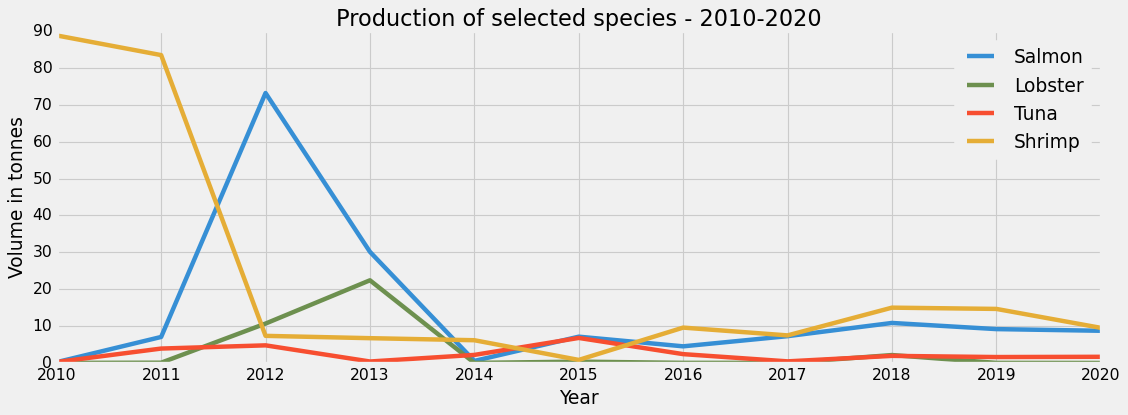

In [2472]:
# Total Production per species and country

# visualization with matplotlib
# line graph with development of production volume totals

plt.style.use('fivethirtyeight')

selected_production_EU_salmon = selected_production_EU[selected_production_EU.species == 'Salmon']
selected_production_EU_lobster = selected_production_EU[selected_production_EU.species == 'Lobster']
selected_production_EU_tuna = selected_production_EU[selected_production_EU.species == 'Tuna']
selected_production_EU_shrimp = selected_production_EU[selected_production_EU.species == 'Shrimp']

plt.figure(figsize=(15, 5))

plt.plot(selected_production_EU_salmon["year"], selected_production_EU_salmon["volume"]/10**6, color="#368FD5")
plt.plot(selected_production_EU_lobster["year"], selected_production_EU_lobster["volume"]/10**6, color="#6D904F")
plt.plot(selected_production_EU_tuna["year"], selected_production_EU_tuna["volume"]/10**6, color="#F74E30")
plt.plot(selected_production_EU_shrimp["year"], selected_production_EU_shrimp["volume"]/10**6, color="#E5AD36")
plt.ticklabel_format(useOffset=False)
plt.xticks(list(selected_production_EU.year.unique()))
plt.title("Production of selected species - 2010-2020")
plt.xlabel("Year")
plt.ylabel("Volume in tonnes")
plt.legend(["Salmon", "Lobster", "Tuna", "Shrimp"], loc="best")
plt.show()

# Export dataframes to Dbeaver for possible visualization with Tableau

In [2473]:
# Create dataframe for Tableau with all countries
fish_catch_final.head()
fish_catch_final.insert(7, "production_method", "Fish catch")
fish_production_all_countries = pd.concat([fish_catch_final, aquaculture_final_10years], axis=0)
fish_production_all_countries.drop(columns="fishing_region" , inplace=True)
fish_production_all_countries.info()
fish_production_all_countries.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 0 to 1305
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             6797 non-null   object 
 1   year                6797 non-null   int64  
 2   unit                6797 non-null   object 
 3   volume              6797 non-null   float64
 4   species             6797 non-null   object 
 5   categories_species  6797 non-null   object 
 6   production_method   6797 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 424.8+ KB


,country,year,unit,volume,species,categories_species,production_method
0,Belgium,2010,Tonnes live weight,11567.10,"Flounders, halibuts, soles",Marine fishes,Fish catch
1,Belgium,2010,Tonnes live weight,1992.80,"Cods, hakes, haddocks",Marine fishes,Fish catch
2,Belgium,2010,Tonnes live weight,298.90,Miscellaneous coastal fishes,Marine fishes,Fish catch
3,Belgium,2010,Tonnes live weight,2072.80,Miscellaneous demersal fishes,Marine fishes,Fish catch
4,Belgium,2010,Tonnes live weight,2.30,"Herrings, sardines, anchovies",Marine fishes,Fish catch
5,Belgium,2010,Tonnes live weight,54.80,Miscellaneous pelagic fishes,Marine fishes,Fish catch
6,Belgium,2010,Tonnes live weight,1820.00,"Sharks, rays, chimaeras",Marine fishes,Fish catch
7,Belgium,2010,Tonnes live weight,95.30,"Crabs, sea-spiders",Crustaceans,Fish catch
8,Belgium,2010,Tonnes live weight,144.40,"Lobsters, spiny-rock lobsters",Crustaceans,Fish catch
9,Belgium,2010,Tonnes live weight,2078.10,"Shrimps, prawns",Crustaceans,Fish catch


In [2474]:
## fish_production_all_countries - export to DBeaver for possible Tableau visualization

# Import get_engine from sql_functions.py. You will need to restart your kernel and rerun at this point since we changed the module since we first imported it.
from sql_functions import get_engine
# create a variable called engine using the get_engine function
engine = get_engine()

# Set the schema to your capstone schema and the table_name variable to 'fish_catch' etc + your initials/group number

schema = 'capstone_fish_are_friends' # capstone schema example capstone_fish_are_friends
table_name = 'fish_production_all_countries' # Example: 'carriers_pw' for Philipp Wendt


# Write records stored in a dataframe to SQL database using to_sql() function
if engine!=None:
   try:
      fish_production_all_countries.to_sql(name=table_name, # Name of SQL table variable
                        con=get_engine(), # Engine or connection
                        schema=schema, # your class schema variable
                        if_exists='replace', # Drop the table before inserting new values 
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
      print(f"The {table_name} table was imported successfully.")
    # Error handling
   except (Exception, psycopg2.DatabaseError) as error:
      print(error)
      engine = None
else:
   print('No engine')

The fish_production_all_countries table was imported successfully.


In [2475]:
## selected_production_country - export to DBeaver for possible Tableau visualization

# Import get_engine from sql_functions.py. You will need to restart your kernel and rerun at this point since we changed the module since we first imported it.
from sql_functions import get_engine
# create a variable called engine using the get_engine function
engine = get_engine()

# Set the schema to your capstone schema and the table_name variable to 'fish_catch' etc + your initials/group number

schema = 'capstone_fish_are_friends' # capstone schema example capstone_fish_are_friends
table_name = 'selected_production_country' # Example: 'carriers_pw' for Philipp Wendt


# Write records stored in a dataframe to SQL database using to_sql() function
if engine!=None:
   try:
      selected_production_country.to_sql(name=table_name, # Name of SQL table variable
                        con=get_engine(), # Engine or connection
                        schema=schema, # your class schema variable
                        if_exists='replace', # Drop the table before inserting new values 
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
      print(f"The {table_name} table was imported successfully.")
    # Error handling
   except (Exception, psycopg2.DatabaseError) as error:
      print(error)
      engine = None
else:
   print('No engine')

The selected_production_country table was imported successfully.
